# Doit Pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/gapminder.tsv', sep='\t')

In [3]:
# 데이터 프레임에서 가장 앞에 있는 5개의 행
print(df.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


In [4]:
# 자료형 확인
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
# 데이터의 행과 열의 크기에 대한 정보 shape 속성
# 주의) shape() --> X
print(df.shape)

(1704, 6)


In [6]:
# 데이터 프레임의 열 이름을 확인
print(df.columns)

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [7]:
# 데이터프레임을 구성하는 값의 자료형은
# 데이터 프레임의 dtypes, info()로 확인
print(df.dtypes)
print()
print(df.info())

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


| 판다스 자료형 | 파이썬 자료형 | 설명|
|------|------|------|
| object | string | 문자열|
| int64 | int | 정수 |
| float64 | float | 소수점을 가진 숫자 (실수) |
| datetime64 | datetime | 파이썬 표준 라이브러리인 datetime을 반환하는 자료형 |

### 열단위로 데이터 추출하기

In [8]:
country_df = df['country']

print(type(country_df))
print(country_df.head())
print(country_df.tail())

<class 'pandas.core.series.Series'>
0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object
1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [9]:
# 리스트에 열이름을 전달하면여러개의 열을 한번에 추출할 수 있다.
subset = df[['country', 'continent', 'year']]

print(type(subset))
print(subset.head())
print(subset.tail())

<class 'pandas.core.frame.DataFrame'>
       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972
       country continent  year
1699  Zimbabwe    Africa  1987
1700  Zimbabwe    Africa  1992
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007


### 행 단위로 데이터 추출

* loc[ ] - 인덱스(숫자 eg. 보통 행번호, 문자)를 기준으로 행 데이터 추출


** 인덱스(문자, 숫자) eg. 숫자는 보통 행번호 **

In [10]:
print(df.loc[0])
print(df.loc[99])
print(df.loc[-1]) # -1 처럼 인덱스에 없는 값을 사용하면 오류 발생

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object


KeyError: 'the label [-1] is not in the [index]'

In [11]:
# 마지막 행 데이터 추출
print(df.loc[df.shape[0]-1])
print(df.tail(n=1))

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [12]:
# 인덱스가 0, 99, 999인 데이터를 한번에 추출
print(df.loc[[0, 99, 999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


In [13]:
# loc 속성이 반환한 자료형은 series
# tail() 메서드가 반환한 자료형은 data frame
print(type( df.loc[0] ))
print(type( df.tail(n=1) ))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


* iloc[ ] - 행 번호를 기준으로 행 데이터 추출

In [14]:
# 현재는 인덱스와 행번호가 동일하여 동일한 결과값을 출력.
print(df.loc[1])
print(df.iloc[1])
print(df.loc[99])
print(df.iloc[99])

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object
country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object
country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object
country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object


In [15]:
# iloc는 행번호를 사용하기 때문에 -1 가능
# loc는 인덱스를 사용하기 때문에 -1 불가능
print(df.iloc[-1])
print(df.loc[-1])

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


KeyError: 'the label [-1] is not in the [index]'

* df.loc[[행], [열]]
* df.iloc[[행], [열]]

In [16]:
print(df.loc[:, ['year', 'pop']].head()) # 인덱스로
print(df.iloc[:, [2, 4, -1]].head()) # 행 번호로

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460
   year       pop   gdpPercap
0  1952   8425333  779.445314
1  1957   9240934  820.853030
2  1962  10267083  853.100710
3  1967  11537966  836.197138
4  1972  13079460  739.981106


In [17]:
# range를 활용하기도 하지만, 보통 slice 구문을 활용한다.
print(df.iloc[:, list(range(0, 6, 2))].head())
print(df.iloc[:, 0:6:2].head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460
       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


In [18]:
print(df.iloc[[0, 9, 99], [0, 3, 5]])
print(df.loc[[0, 9, 99], ['country', 'lifeExp', 'gdpRercap']])

        country  lifeExp   gdpPercap
0   Afghanistan   28.801  779.445314
9   Afghanistan   41.763  635.341351
99   Bangladesh   43.453  721.186086
        country  lifeExp  gdpRercap
0   Afghanistan   28.801        NaN
9   Afghanistan   41.763        NaN
99   Bangladesh   43.453        NaN


C:\Users\renz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [19]:
# 위에 처럼, loc 나 []를 사용하면 실수가 발생할 수 있다.
# 그래서, .reindex() 사용을 추천한다.
df.reindex(['country', 9, 99], axis='columns').head()

country   9  99
0  Afghanistan NaN NaN
1  Afghanistan NaN NaN
2  Afghanistan NaN NaN
3  Afghanistan NaN NaN
4  Afghanistan NaN NaN

### 시리즈 만들기

In [21]:
# 시리즈 - 하나의 열(cloumn) 만들기
s = pd.Series(['banana',  42])
print(s)

0    banana
1        42
dtype: object


In [26]:
# index 인자를 활용하여 문자열 인덱스를 지정
s = pd.Series(['Wes Mckinney', 'Creator of Pandas'], index = ['Person', 'Who'])
print(s)

Person         Wes Mckinney
Who       Creator of Pandas
dtype: object


In [27]:
# 데이터 프레임을 만들기 위해서 Dictionary를 전달
scientists = pd.DataFrame({
    'Name': ['Rosaline Franklin', 'William Gosset'],
    'Occupation': ['Chemist', 'Statistician'],
    'Born': ['1920-07-25', '1876-06-13'],
    'Died': ['1958-04-16', '1973-10-16'],
    'Age': [37, 61]
})
print(scientists)

                Name    Occupation        Born        Died  Age
0  Rosaline Franklin       Chemist  1920-07-25  1958-04-16   37
1     William Gosset  Statistician  1876-06-13  1973-10-16   61


In [29]:
# 데이터 프레임을 만들기 위해서 Dictionary를 전달
# data 인자에 ['Name', 'Occupation', 'Born', 'Died', 'Age']순서로 전달했어도
# columns ['Name', 'Occupation', 'Born', 'Age', 'Died']인자 순을 따른다.
scientists = pd.DataFrame(
    data = {
    'Name': ['Rosaline Franklin', 'William Gosset'],
    'Occupation': ['Chemist', 'Statistician'],
    'Born': ['1920-07-25', '1876-06-13'],
    'Died': ['1958-04-16', '1973-10-16'],
    'Age': [37, 61]},
    index = ['Rosaline Franklin', 'William Gosset'],
    columns = ['Name', 'Occupation', 'Born', 'Age', 'Died']
)
print(scientists)

                                Name    Occupation        Born  Age  \
Rosaline Franklin  Rosaline Franklin       Chemist  1920-07-25   37   
William Gosset        William Gosset  Statistician  1876-06-13   61   

                         Died  
Rosaline Franklin  1958-04-16  
William Gosset     1973-10-16  


In [35]:
# 딕셔너리의 데이터 순서를 그대로 유지하면서 데이터 프레임을 만들고 싶다면
# OrderedDict() 을 사용한다.
from collections import OrderedDict

scientists = pd.DataFrame(
    data = OrderedDict([
    ('Name', ['Rosaline Franklin', 'William Gosset']),
    ('Occupation', ['Chemist', 'Statistician']),
    ('Born', ['1920-07-25', '1876-06-13']),
    ('Died', ['1958-04-16', '1973-10-16']),
    ('Age', [37, 61])
    ]),
    index = ['Rosaline Franklin', 'William Gosset'],
    columns = ['Name', 'Occupation', 'Born', 'Age', 'Died']
)
print(scientists)

                                Name    Occupation        Born  Age  \
Rosaline Franklin  Rosaline Franklin       Chemist  1920-07-25   37   
William Gosset        William Gosset  Statistician  1876-06-13   61   

                         Died  
Rosaline Franklin  1958-04-16  
William Gosset     1973-10-16  


In [38]:
# loc 속성에 인덱스를 전달하면 Return: Series
print(type(scientists.loc['William Gosset']))
print(type(scientists.iloc[1]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [43]:
# 주의) Age가 int형임에도 불구하고 dtype은 object로 반환된다.
print(scientists.loc['William Gosset'])
print(type(scientists.loc['William Gosset', 'Age']))

Name          William Gosset
Occupation      Statistician
Born              1876-06-13
Age                       61
Died              1973-10-16
Name: William Gosset, dtype: object
<class 'numpy.int64'>


In [46]:
# Series의 인덱스 속성 확인
# .index or .keys() 를 사용
print(scientists.loc['William Gosset'].index)
print(scientists.loc['William Gosset'].keys())

Index(['Name', 'Occupation', 'Born', 'Age', 'Died'], dtype='object')
Index(['Name', 'Occupation', 'Born', 'Age', 'Died'], dtype='object')


In [45]:
# Series의 data 속성 확인
# .values 를 사용
print(scientists.loc['William Gosset'].values)

['William Gosset' 'Statistician' '1876-06-13' 61 '1973-10-16']


In [48]:
# Series의 인덱스의 첫번째 값 확인
print(scientists.loc['William Gosset'].index[0])
print(scientists.loc['William Gosset'].keys()[0])

Name
Name


In [56]:
ages = scientists['Age']
print(type(ages))
print(ages)
print()
print('# 기초 통계 메서드 확인')
print(ages.mean())
print(ages.min())
print(ages.max())
print(ages.std())

<class 'pandas.core.series.Series'>
Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64

# 기초 통계 메서드 확인
49.0
37
61
16.97056274847714


| 시리즈 메서드 | 설명 |
| ------------- | --- |
| append() | 2개 이상의 시리즈 연결 |
| describe() | 요약 통계량 계산 |
| drop_duplicates() |  중복값이 없는 시리즈 반환 |
| equals() | 시리즈에 해당 값을 가진 요소가 있는지 확인 |
| get_values() | 시리즈 값 구하기 |
| isin() | 시리즈에 해당 값을 가진 요소가 있는지 확인 |
| min() | 최소값 반환 |
| max() | 최대값 반환 |
| mean() | 산술 평균 반환 |
| median() | 중간값 반환 |
| replace() | 특정 값을 가진 시리즈 값을 교체 |
| sample() | 시리즈에서 임의의 값을 반환 |
| sort_values() | 값을 정렬 |
| to_frame() | 시리즈를 데이터프레임으로 반환 |

In [77]:
# 시리즈의 메서드 확인
ages = scientists['Age']
names = scientists['Name']

print('*** append() ***\n',ages.append(names))
print('*** describe() ***\n',ages.describe())
print('*** drop_duplicates() ***\n',ages.drop_duplicates())
print('*** equals() ***\n',ages.equals(37))
print('*** get_values() ***\n',ages.get_values())
print('*** isin() ***\n',ages.isin([37, 31])) # list를 인자로 가진다.
print('*** min() ***\n',ages.min())
print('*** max() ***\n',ages.max())
print('*** mean() ***\n',ages.mean())
print('*** median() ***\n',ages.median())
print('*** replace() ***\n',ages.replace())
print('*** sample() ***\n',ages.sample())
print('*** sort_values() ***\n',ages.sort_values())
print('*** to_frame() ***\n',ages.to_frame())

*** append() ***
 Rosaline Franklin                   37
William Gosset                      61
Rosaline Franklin    Rosaline Franklin
William Gosset          William Gosset
dtype: object
*** describe() ***
 count     2.000000
mean     49.000000
std      16.970563
min      37.000000
25%      43.000000
50%      49.000000
75%      55.000000
max      61.000000
Name: Age, dtype: float64
*** drop_duplicates() ***
 Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64
*** equals() ***
 False
*** get_values() ***
 [37 61]
*** isin() ***
 Rosaline Franklin     True
William Gosset       False
Name: Age, dtype: bool
*** min() ***
 37
*** max() ***
 61
*** mean() ***
 49.0
*** median() ***
 49.0
*** replace() ***
 Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64
*** sample() ***
 William Gosset    61
Name: Age, dtype: int64
*** sort_values() ***
 Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64
*** to_frame() ***
                    

### 시리즈 다루기 - 응용

* 시리즈 boolean 추출

In [126]:
scientists = pd.read_csv('../data/scientists.csv')
ages = scientists['Age']

In [127]:
print(ages.max())
print(ages.mean())

90
59.125


In [128]:
print(ages[ages > ages.mean()])

1    61
2    90
3    66
7    77
Name: Age, dtype: int64


In [129]:
print(ages > ages.mean())

0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool


In [130]:
manual_bool_values = [True, True, False, False, True, True, False, True]
print(ages[manual_bool_values])

0    37
1    61
4    56
5    45
7    77
Name: Age, dtype: int64


* 시리즈와 브로드 캐스팅

In [131]:
print(ages + ages)

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


In [132]:
print(ages * ages)

0    1369
1    3721
2    8100
3    4356
4    3136
5    2025
6    1681
7    5929
Name: Age, dtype: int64


In [133]:
# 백터의 모든 값에 스칼라 값을 적용
print(ages + 100)

0    137
1    161
2    190
3    166
4    156
5    145
6    141
7    177
Name: Age, dtype: int64


In [134]:
# 길이가 서로 다른 백터를 연산
# 같은 인덱스의 값만 계산한다.
print(pd.Series([1, 100]))
print(ages + pd.Series([1, 100]))

0      1
1    100
dtype: int64
0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64


In [135]:
# 인덱스의 역순으로 정렬(내림 차순)
# 주의) 데이터 가준이 아니라 인덱스 기준이다.
rev_ages = ages.sort_index(ascending=False)
print(rev_ages)

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64


In [136]:
# 시리즈와 시리즈의 연산은 
# 같은 인덱스를 기준으로 연산을 하기때문에 결과가 같다.
print(ages * 2)
print(ages + rev_ages)

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64
0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


### 데이터 프레임 다루기

* 데이터 프레임과 boolean 추출

In [137]:
print(scientists[scientists['Age'] > scientists['Age'].mean()])

                   Name        Born        Died  Age     Occupation
1        William Gosset  1876-06-13  1937-10-16   61   Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90          Nurse
3           Marie Curie  1867-11-07  1934-07-04   66        Chemist
7          Johann Gauss  1777-04-30  1855-02-23   77  Mathematician


In [138]:
# 데이터의 행길이보다 짧으면 bool벡터의 길이만큼 연산한다.
print(scientists.loc[[True, True, False, True]])

                Name        Born        Died  Age    Occupation
0  Rosaline Franklin  1920-07-25  1958-04-16   37       Chemist
1     William Gosset  1876-06-13  1937-10-16   61  Statistician
3        Marie Curie  1867-11-07  1934-07-04   66       Chemist


In [139]:
# 데이터 프레임에 스칼라 연산을 하면...
# 모든 요소에 스칼라 연산을 한다.
# eg. 문자열 2배, 숫자 2배
print(scientists * 2)

                                       Name                  Born  \
0        Rosaline FranklinRosaline Franklin  1920-07-251920-07-25   
1              William GossetWilliam Gosset  1876-06-131876-06-13   
2  Florence NightingaleFlorence Nightingale  1820-05-121820-05-12   
3                    Marie CurieMarie Curie  1867-11-071867-11-07   
4                Rachel CarsonRachel Carson  1907-05-271907-05-27   
5                        John SnowJohn Snow  1813-03-151813-03-15   
6                    Alan TuringAlan Turing  1912-06-231912-06-23   
7                  Johann GaussJohann Gauss  1777-04-301777-04-30   

                   Died  Age                            Occupation  
0  1958-04-161958-04-16   74                        ChemistChemist  
1  1937-10-161937-10-16  122              StatisticianStatistician  
2  1910-08-131910-08-13  180                            NurseNurse  
3  1934-07-041934-07-04  132                        ChemistChemist  
4  1964-04-141964-04-14  112     

### 시리즈와 데이터프레임의 데이터 처리하기

In [140]:
# 파이썬의 문자열은 판다스에서 Object로 취급한다.
print(scientists['Born'].dtype)
print(scientists['Died'].dtype)

object
object


In [141]:
born_datetime = pd.to_datetime(scientists['Born'], format = '%Y-%m-%d')
print(born_datetime)
died_datetime = pd.to_datetime(scientists['Died'], format = '%Y-%m-%d')
print(died_datetime)

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]
0   1958-04-16
1   1937-10-16
2   1910-08-13
3   1934-07-04
4   1964-04-14
5   1858-06-16
6   1954-06-07
7   1855-02-23
Name: Died, dtype: datetime64[ns]


In [142]:
# 데이터 프레임에 새로운 열 추가하기
scientists['born_dt'], scientists['died_dt'] = (born_datetime, died_datetime)
print(scientists.head())
print(scientists.shape)

                   Name        Born        Died  Age    Occupation    born_dt  \
0     Rosaline Franklin  1920-07-25  1958-04-16   37       Chemist 1920-07-25   
1        William Gosset  1876-06-13  1937-10-16   61  Statistician 1876-06-13   
2  Florence Nightingale  1820-05-12  1910-08-13   90         Nurse 1820-05-12   
3           Marie Curie  1867-11-07  1934-07-04   66       Chemist 1867-11-07   
4         Rachel Carson  1907-05-27  1964-04-14   56     Biologist 1907-05-27   

     died_dt  
0 1958-04-16  
1 1937-10-16  
2 1910-08-13  
3 1934-07-04  
4 1964-04-14  
(8, 7)


In [143]:
scientists['age_days_dt'] = (scientists['died_dt'] - scientists['born_dt'])
print(scientists)
print(scientists['age_days_dt']) # dtype :: timedelta64[ns]

                   Name        Born        Died  Age          Occupation  \
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist   
1        William Gosset  1876-06-13  1937-10-16   61        Statistician   
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse   
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist   
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist   
5             John Snow  1813-03-15  1858-06-16   45           Physician   
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist   
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician   

     born_dt    died_dt age_days_dt  
0 1920-07-25 1958-04-16  13779 days  
1 1876-06-13 1937-10-16  22404 days  
2 1820-05-12 1910-08-13  32964 days  
3 1867-11-07 1934-07-04  24345 days  
4 1907-05-27 1964-04-14  20777 days  
5 1813-03-15 1858-06-16  16529 days  
6 1912-06-23 1954-06-07  15324 days  
7 1777-04-3

* 시리즈 데이터프레임의 데이터 섞기

In [144]:
import random

random.seed(43) # seed() 는 컴퓨터가 생성하는 난수의 기준값을 정하기 위해 사용
random.shuffle(scientists['Age'])
print(scientists['Age'])

C:\Users\renz\Anaconda3\lib\random.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  x[i], x[j] = x[j], x[i]


0    41
1    77
2    56
3    66
4    61
5    45
6    90
7    37
Name: Age, dtype: int64


* 데이터 프레임의 열 삭제하기

In [145]:
print(scientists.columns)

Index(['Name', 'Born', 'Died', 'Age', 'Occupation', 'born_dt', 'died_dt',
       'age_days_dt'],
      dtype='object')


In [161]:
# 데이터 프레임에서 drop() 은
# 삭제된 상태의 데이터프레임이 반환
# axis = 0(행), 1(열)
scientists_dropped = scientists.drop(['Age'], axis=1)
print(scientists.columns)
print(scientists_dropped.columns)

Index(['Name', 'Born', 'Died', 'Age', 'Occupation', 'born_dt', 'died_dt',
       'age_days_dt'],
      dtype='object')
Index(['Name', 'Born', 'Died', 'Occupation', 'born_dt', 'died_dt',
       'age_days_dt'],
      dtype='object')


### 데이터 저장하고 불러오기

* 피클(pickle)은 바이너리 형태로 직렬화한 오브젝트를 저장하는 방법.
* 피클로 저장하면 스프레드시트보다 더 작은 용량으로 데이터를 저장.
* 데이터를 오래 저장한다는 뜻으로 피클이라고 이름을 붙임.

In [149]:
# 시리즈를 pickle로 저장하기
names = scientists['Name']
names.to_pickle('../output/scientists_name_series.pickle')

In [150]:
# 데이터 프레임을 pickle로 저장하기
scientists.to_pickle('../output/scientists_df.pickle')

In [152]:
scientist_names_from_pickle = pd.read_pickle('../output/scientists_name_series.pickle')
print(scientist_names_from_pickle)

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object


In [154]:
scientist_from_pickle = pd.read_pickle('../output/scientists_df.pickle')
print(scientist_from_pickle)

                   Name        Born        Died  Age          Occupation  \
0     Rosaline Franklin  1920-07-25  1958-04-16   41             Chemist   
1        William Gosset  1876-06-13  1937-10-16   77        Statistician   
2  Florence Nightingale  1820-05-12  1910-08-13   56               Nurse   
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist   
4         Rachel Carson  1907-05-27  1964-04-14   61           Biologist   
5             John Snow  1813-03-15  1858-06-16   45           Physician   
6           Alan Turing  1912-06-23  1954-06-07   90  Computer Scientist   
7          Johann Gauss  1777-04-30  1855-02-23   37       Mathematician   

     born_dt    died_dt age_days_dt  
0 1920-07-25 1958-04-16  13779 days  
1 1876-06-13 1937-10-16  22404 days  
2 1820-05-12 1910-08-13  32964 days  
3 1867-11-07 1934-07-04  24345 days  
4 1907-05-27 1964-04-14  20777 days  
5 1813-03-15 1858-06-16  16529 days  
6 1912-06-23 1954-06-07  15324 days  
7 1777-04-3

* csv 로 저장

In [157]:
names.to_csv('../output/scientists_name_series.csv')
scientists.to_csv('../output/scientists_df.tsv', sep='\t')

* exel로 저장
* import xlwt 는 .xls
* import openpyxl 는 .xlsx

In [159]:
names_df = names.to_frame()

import xlwt
names_df.to_excel('../output/scientists_names_series_df.xls')

import openpyxl
names_df.to_excel('../output/scientists_names_series_df.xlsx')

### 그래프 그리기

* 데이터 시각화가 필요한 이유
    * 평균, 분산과 같은 수칫값이나 상관관계, 회귀선이 같다는 특징이 있다.
    * 그래서 이런 결과만 보고 데이터 그룹의 데티터는 모두 같을 것이다라고 착각을 할 수 있다.

In [163]:
import seaborn as sns

anscombe = sns.load_dataset('anscombe')
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

### 기초 그래프 그리기

<IPython.core.display.Javascript object>


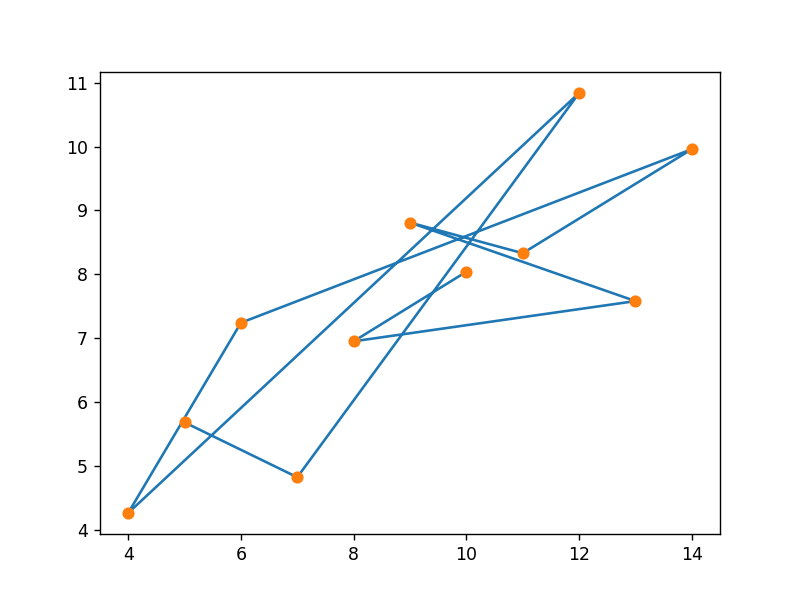

In [171]:
%matplotlib notebook
import matplotlib.pyplot as plt

dataset_1 = anscombe[anscombe['dataset'] == 'I']
plt.plot(dataset_1['x'], dataset_1['y'])
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

In [172]:
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

<IPython.core.display.Javascript object>


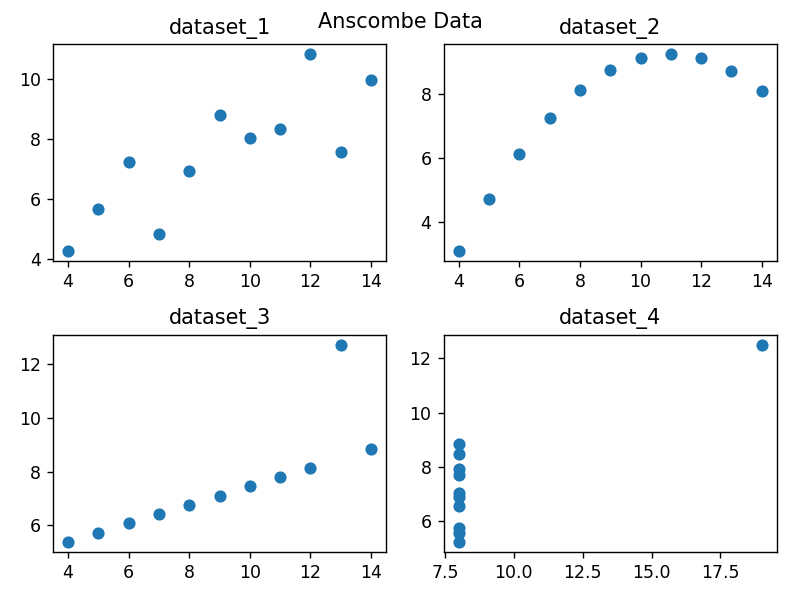

In [187]:
# 그래프 격자가 위치할 기본 틀을 만든다.
fig = plt.figure()

# .add_subplot(행 크기, 열 크기, index) 를 통해 그래프의 격자를 그린다.
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

# .plot(데이터) 를 전달하여 그래프를 그린다. 
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

# .그래프 격자에 제목을 추가.
axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

# fig(기본 틀)에도 제목을 추가하기
# suptitle(제목)을 사용
fig.suptitle('Anscombe Data')

# .tight_layout() 메서드를 호출하여 각 그래프의 레이아웃을 조절할수 있다.
# 각 그래프의 이름과 숫자가 겹쳐보이는 것을 해결
fig.tight_layout()

# 그래프를 확인하려면 fig를 입력한다.
#fig

In [190]:
tips = sns.load_dataset('tips')
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


### 히스토그램 그리기

<IPython.core.display.Javascript object>


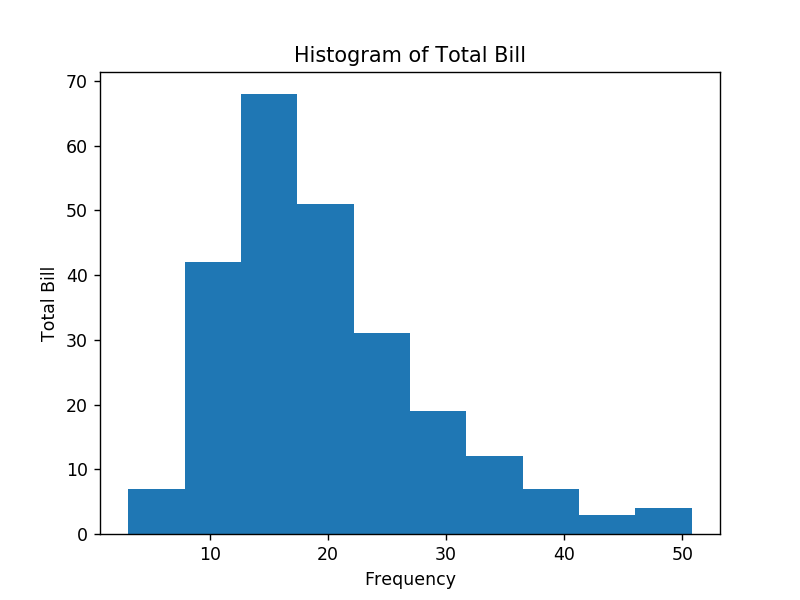

Text(0,0.5,'Total Bill')

In [196]:
fig = plt.figure()

axes1 = fig.add_subplot(1, 1, 1)

axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

### 산점도 그래프 그리기

* 변수 2개를 사용하여 만드는 그래프
* 통계 용어로 이변량 그래프라고 부른다.

<IPython.core.display.Javascript object>


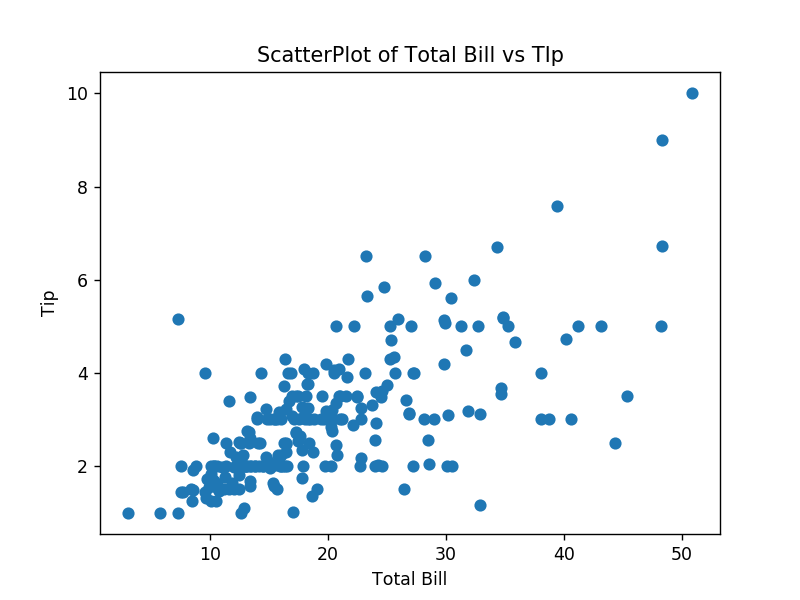

Text(0,0.5,'Tip')

In [197]:
scatter_plot = plt.figure()

axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('ScatterPlot of Total Bill vs TIp')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

### 박스 그래프 그리기

* 이산형 변수와 연속형 변수를 함께 사용하는 그래프다.
* 이산형 변수 - Female, Male 과 같이 명확하게 구분되는 값을 의미
* 연속형 변수 - Tip과 같이 명확하게 셀 수 없는 범위의 값을 의미.

<IPython.core.display.Javascript object>


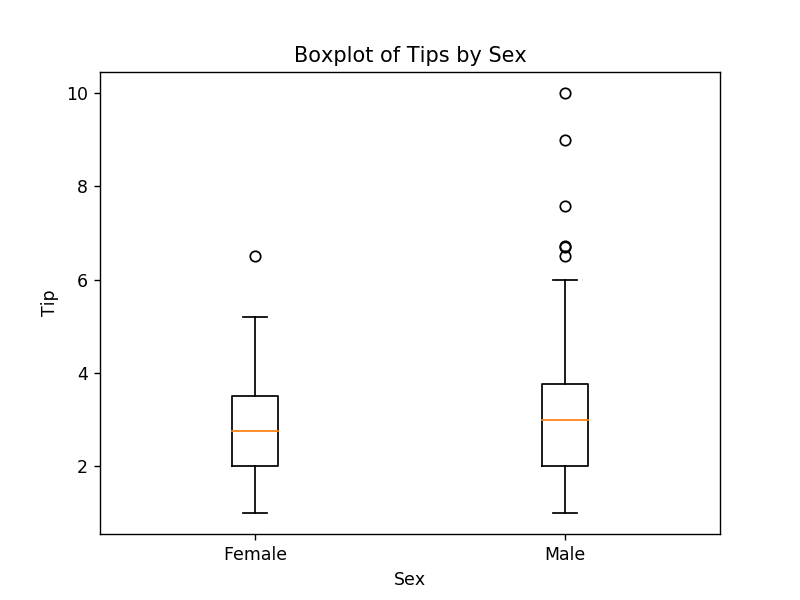

Text(0.5,1,'Boxplot of Tips by Sex')

In [198]:
boxplot = plt.figure()

axes1 = boxplot.add_subplot(1, 1, 1)
axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
              tips[tips['sex'] == 'Male']['tip']],
             labels = ['Female', 'Male'])

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

### 다변량 그래프 그리기

* 3개 이상의 변수를 사용한 그래프
* 점의 색상이나 크기를 다르게 표현하는 방법으로 산점도 그래프를 표현할 수 있다.

In [199]:
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1
    
tips['sex_color'] = tips['sex'].apply(recode_sex)

<IPython.core.display.Javascript object>


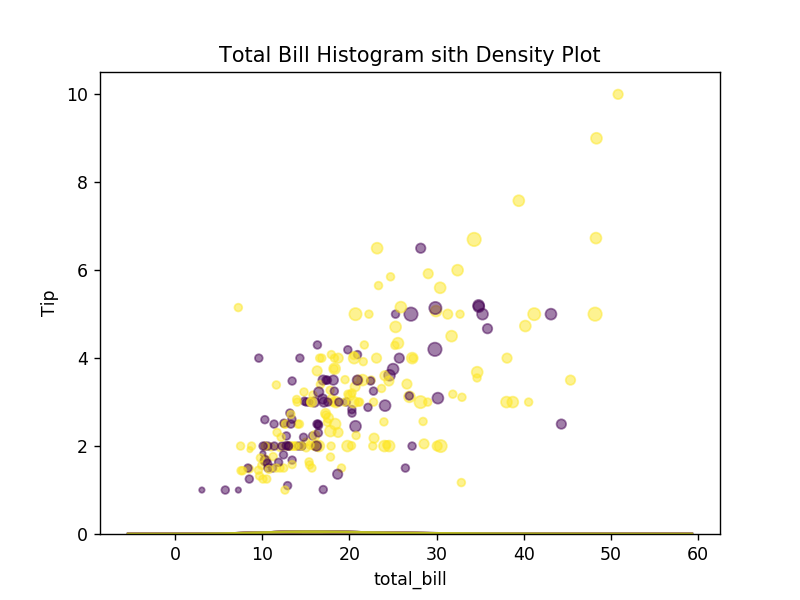

Text(0,0.5,'Tip')

In [206]:
scatter_plot = plt.figure()

# x = x축
# y = y축
# s = 점의 크기(size)
# c = 점의 색상(color)
# alpha = 점의 투명도
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
    x = tips['total_bill'],
    y = tips['tip'],
    s = tips['size'] * 10,
    c = tips['sex_color'],
    alpha=0.5
)

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

### seaborn을 활용한 화려한 그래프 그리기

* seaborn 라이브러리는 matplotlib 라이브러리를 기반으로 만든 라이브러리입니다.

In [290]:
import seaborn as sns

tips = sns.load_dataset('tips')

### 단변량 그래프 그리기 - 히스토그램
* 밀집도 그래프 True
* cf) 밀집도 그래프 - 주어진 데이터를 정규화시켜 넓이가 1이 되도록 그린 그래프

In [ ]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram sith Density Plot')

* 밀집도 그래프 제외

<IPython.core.display.Javascript object>


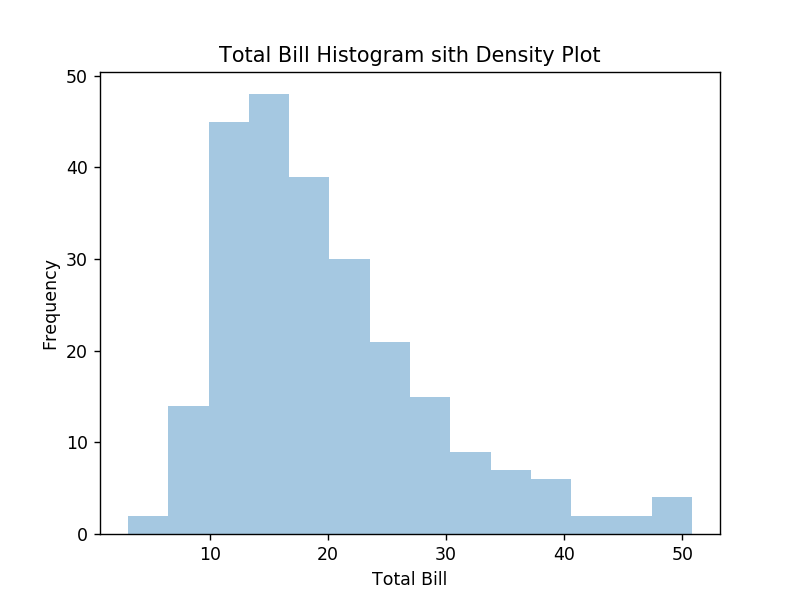

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

In [310]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde = False)
ax.set_title('Total Bill Histogram sith Density Plot')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

* 밀집도 그래프만 나타내려면 hist=False

<IPython.core.display.Javascript object>


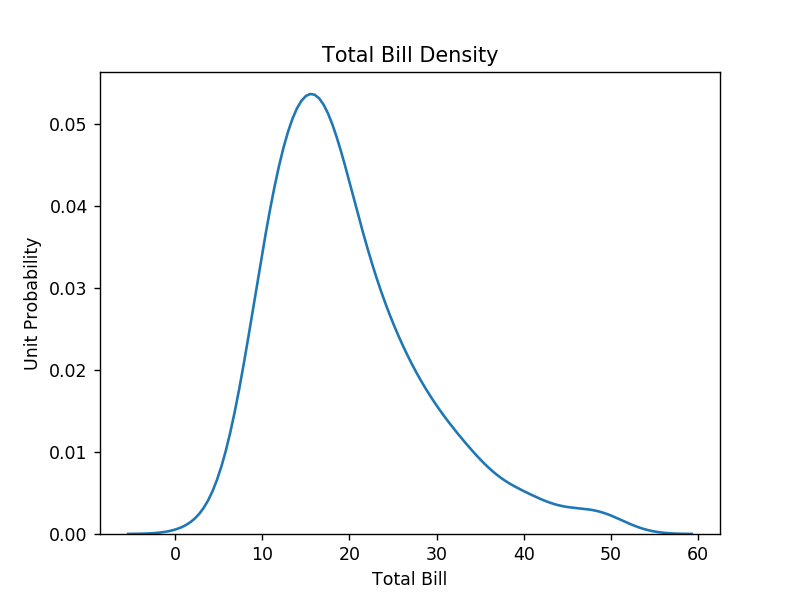

Text(0,0.5,'Unit Probability')

In [293]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False)
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

### 양탄자 그래프(rug) True
* 양탄자 그래프는 그래프의 축에 동일한 길이의 직선을 붙여 데이터의 밀집 정도를 표현한 그래프다.

<IPython.core.display.Javascript object>


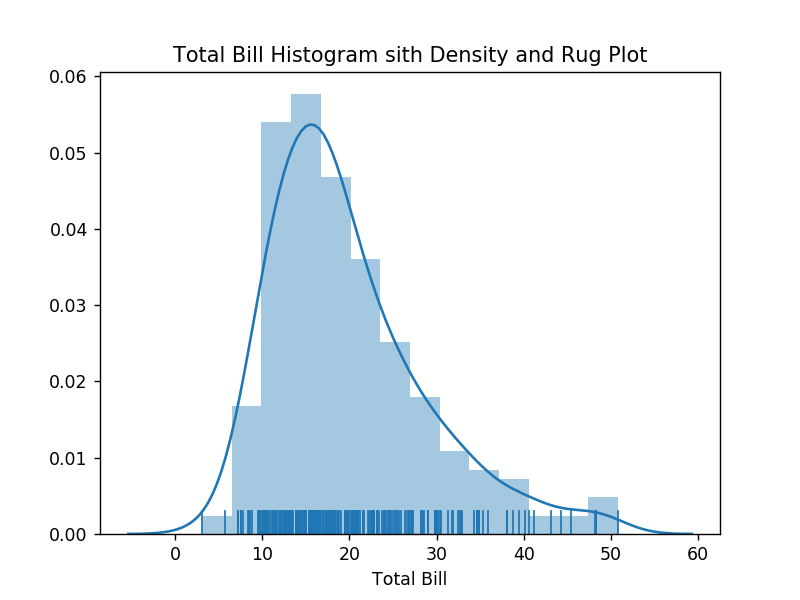

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Total Bill')

In [305]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram sith Density and Rug Plot')
ax.set_xlabel('Total Bill')

### 히스토그램과 비슷하게 생긴 Count 그래프 그리기
* Count 그래프는 이산값을 나타낸 그래프

<IPython.core.display.Javascript object>


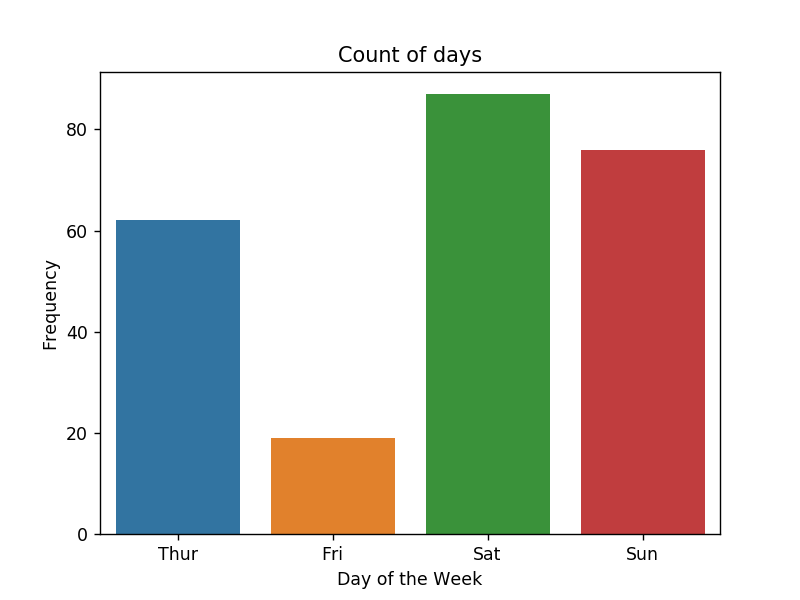

Text(0,0.5,'Frequency')

In [298]:
ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

### regplot() 를 사용하여 산점도 그래프와, 회귀선을 그리기

<IPython.core.display.Javascript object>


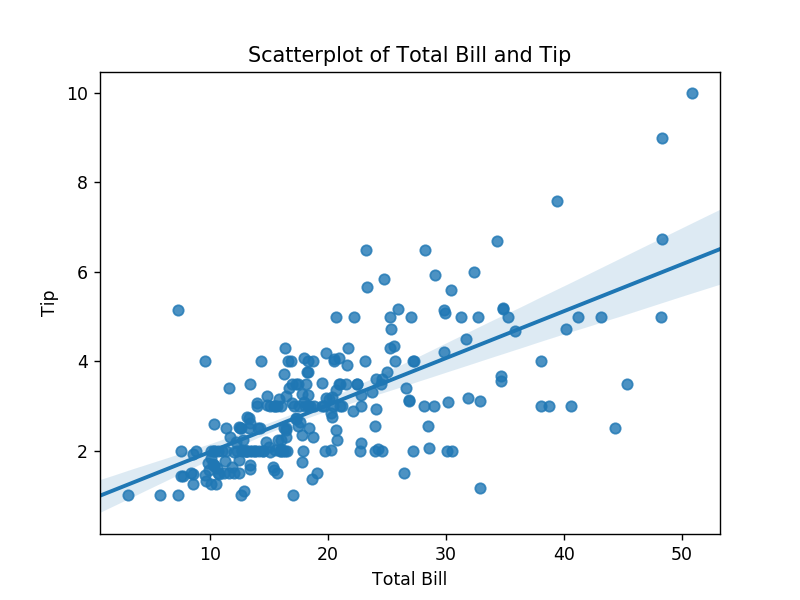

Text(0,0.5,'Tip')

In [299]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

* 회귀선을 제거하려면 fit_reg 인자를 False

<IPython.core.display.Javascript object>


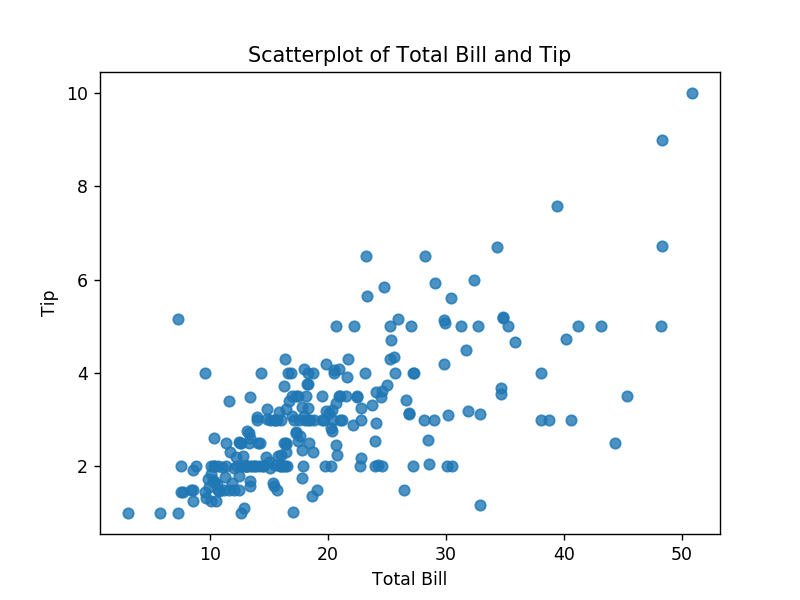

Text(0,0.5,'Tip')

In [300]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

###  jointplot()

* 산점도 그래프와 히스토그램을 한번에 그려준다
* jointplot 은 fig가 내장되어있다.

<IPython.core.display.Javascript object>


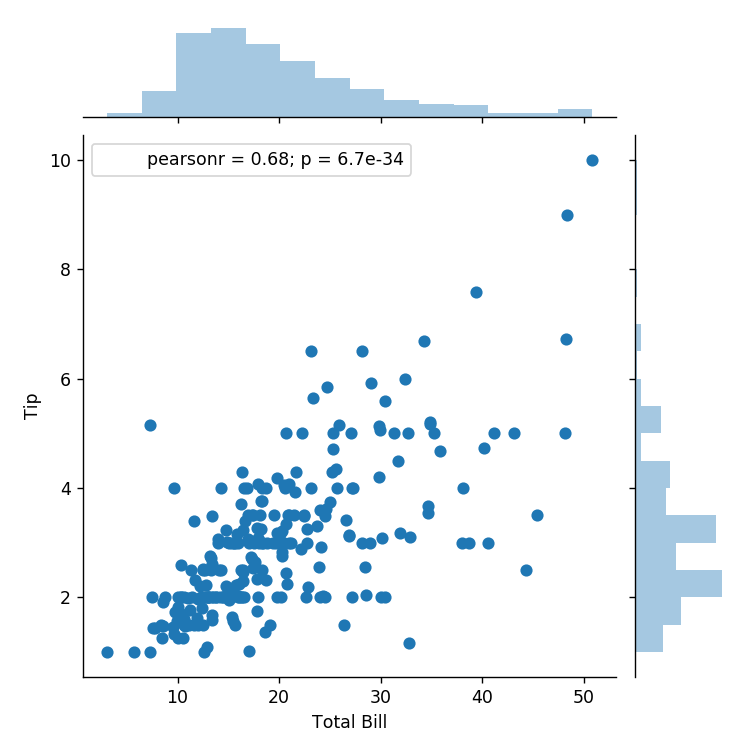

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1.03,'Joint plot of Total Bill and Tip')

In [306]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint plot of Total Bill and Tip', fontsize=10, y=1.03)

### 육각 그래프 그리기
* 산점도 그래프는 점이 겹쳐보일경우 점을 구분하기 어렵다.
* 그래프의 데이터를 구분하기 쉽게 그리기 위해서 육각 그래프를 사용.
* 육각 그래프는 2차원 표면에 육각형으로 데이터를 쌓아 표현하는 그래프이다.
* 특정 데이터의 개수가 많아지면 점점 진한 색으로 표현된다.

<IPython.core.display.Javascript object>


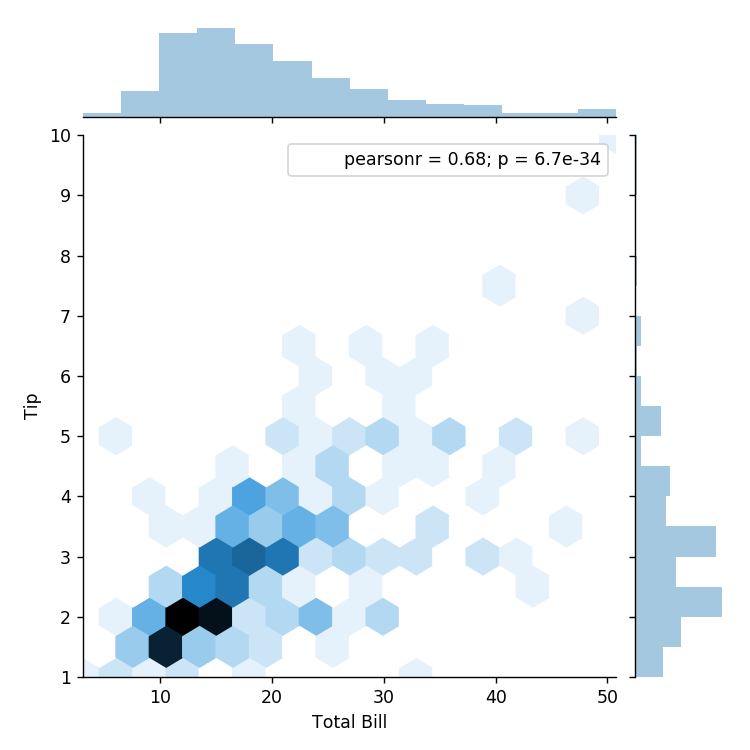

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1.03,'Hexbin Joint Plot of Total Bill and Tip')

In [308]:
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

### 이차원 밀집도 그리기
* kdeplot() 메서드를 사용
* shade 인자가 True 면 그래프의 음영 효과를 줄수 있다.

<IPython.core.display.Javascript object>


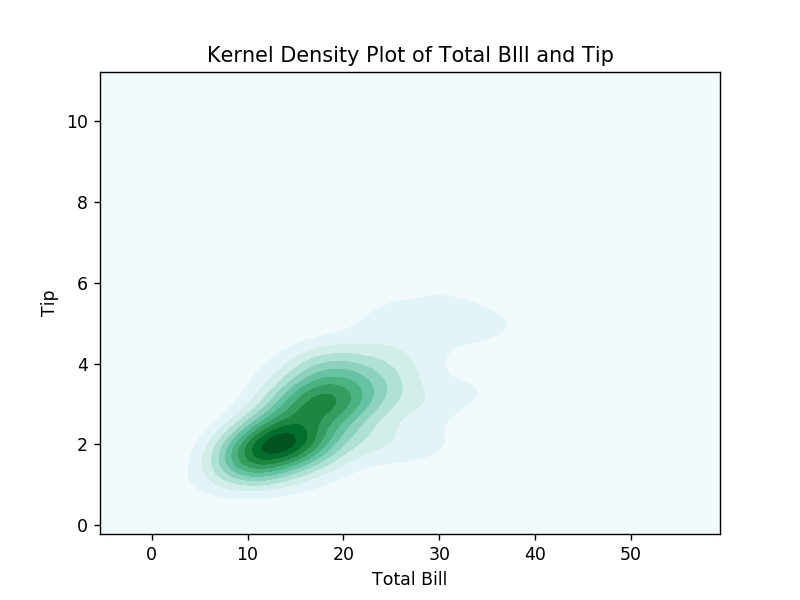

Text(0,0.5,'Tip')

In [312]:
ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
                data2=tips['tip'],
                shade=True)

ax.set_title('Kernel Density Plot of Total BIll and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

### 바 그래프 그리기
* 바 그래프는 지정한 변수의 평균을 계산하여 그림.

<IPython.core.display.Javascript object>


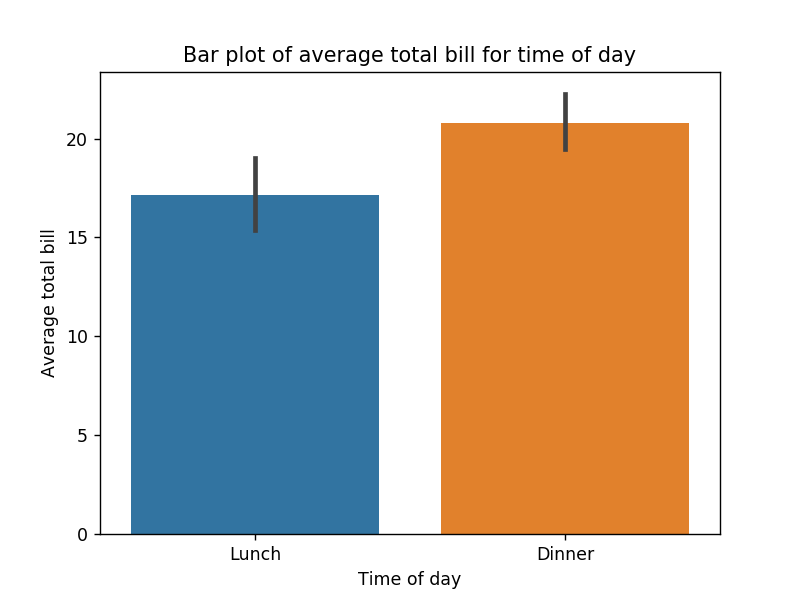

Text(0,0.5,'Average total bill')

In [313]:
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

### 박스 그래프 그리기
* 박스 그래프는 최소값, 1분위수, 중간값, 3분위수, 최대값, 이상치 등 다양한 통계량을 한번에 표현하는 그래프

<IPython.core.display.Javascript object>


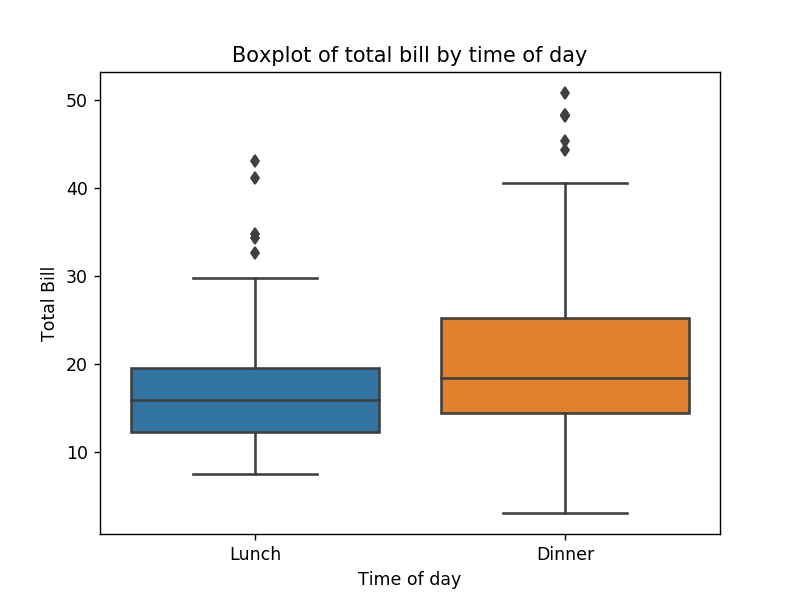

Text(0,0.5,'Total Bill')

In [314]:
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

### 바이올린 그래프
* 박스그래프는 다양한 통계 수치를 확인하기 위해 자주 사용하는 그래프지만,
* 데이터 분산이 모호하게 표현된다.
* 박스 그래프에 커널 밀도를 추정한 바이올린 그래프를 사용하면 된다.
* 쉽게 말해, 박스형태를 바이올린 형태로 바꾸면 바이올린 그래프가 된다.

<IPython.core.display.Javascript object>


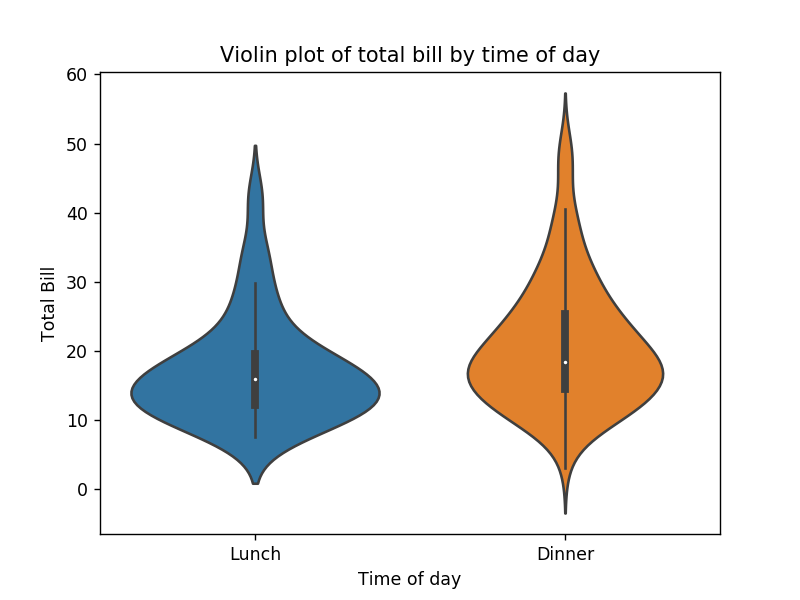

Text(0,0.5,'Total Bill')

In [315]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

### 관계 그래프
* 관계그래프는 지금까지 설명한 그래프를 종합한 그래프.
* pairplot() 를 사용.

<IPython.core.display.Javascript object>


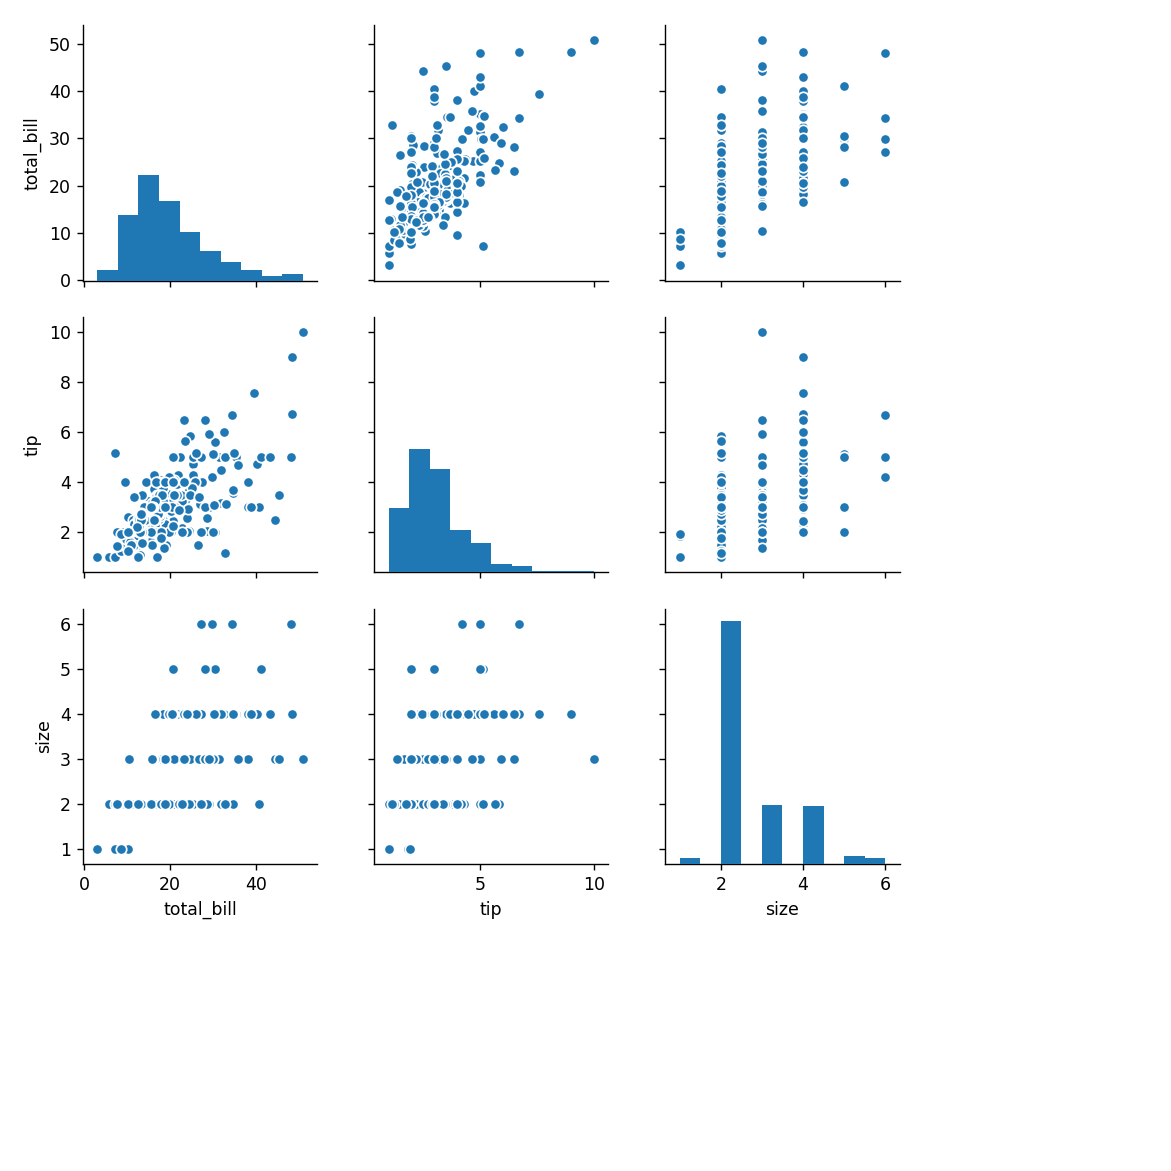

In [316]:
fig = sns.pairplot(tips)

* 이때 관계그래프는 중복된 정보가 표현된다는 단점이 있다.
* (즉, 관계 그래프의 절반은 나머지는 절반과 같습니다.)
* 이런 경우에는, 중복된 그래프가 그려지는 위치를 직접 지정하여 원하는 그래프로 교체하면 됩니다.
* map_upper() 는 대각선을 기준으로 위쪽에 그릴 그래프 지정
* map_lower() 메서드는 대각선을 기준으로 아래쪽으로 그릴 그래프 지정
* map_diag() 메서드는 대각선을 중심으로 그릴 그래프 지정

<IPython.core.display.Javascript object>


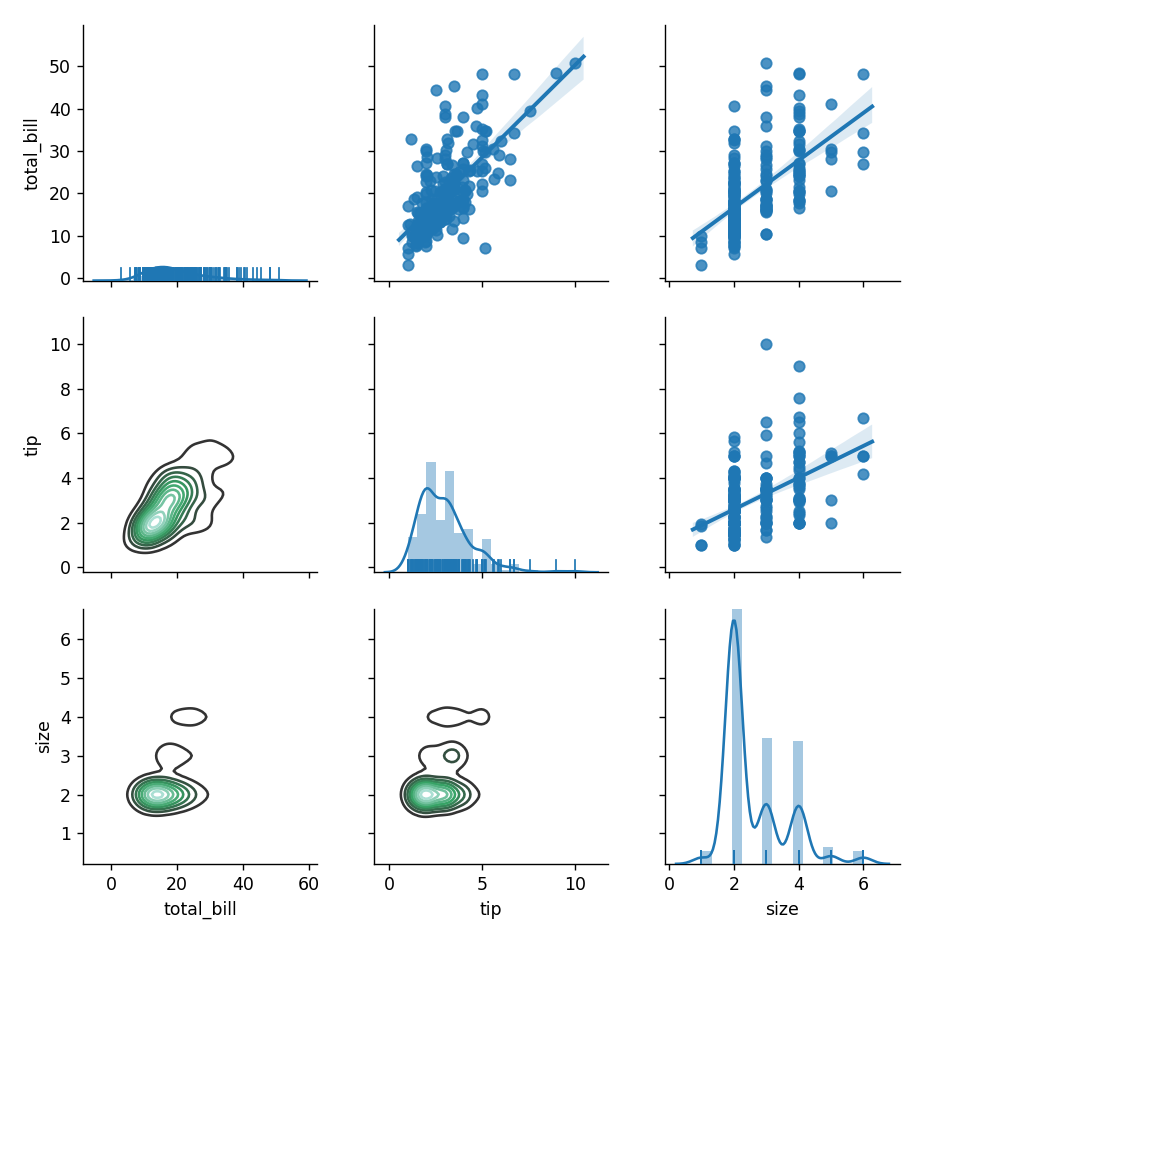

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarnin

In [318]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot) # 산점도 그래프
pair_grid = pair_grid.map_lower(sns.kdeplot) # 이차원 밀집도
pair_grid = pair_grid.map_diag(sns.distplot, rug=True) # 히스토그램, 밀집도 그래프

### seaborn 을 활용한 다변량 그래프 그리기
* 색상으로 구분하기

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


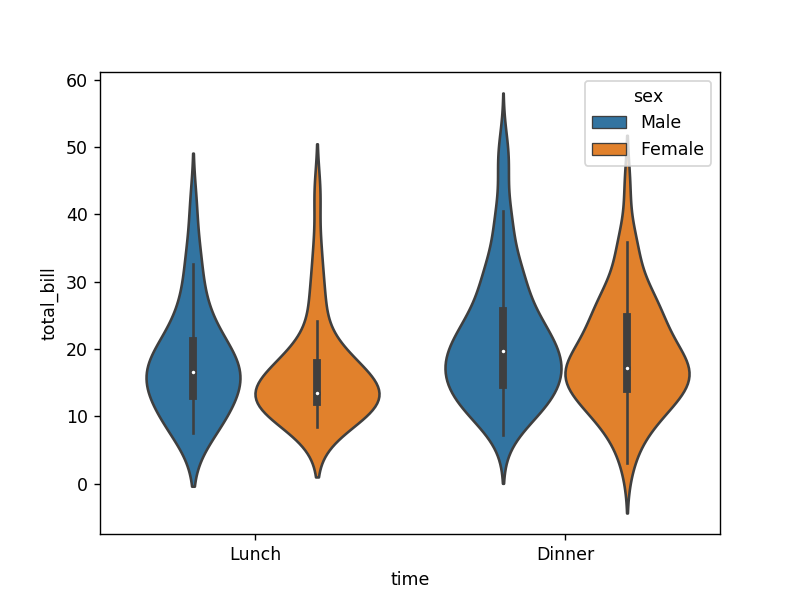

In [320]:
# 색상으로 구분 (hue=열 이름)
# 바이올린을 쪼개기 (split=True)
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


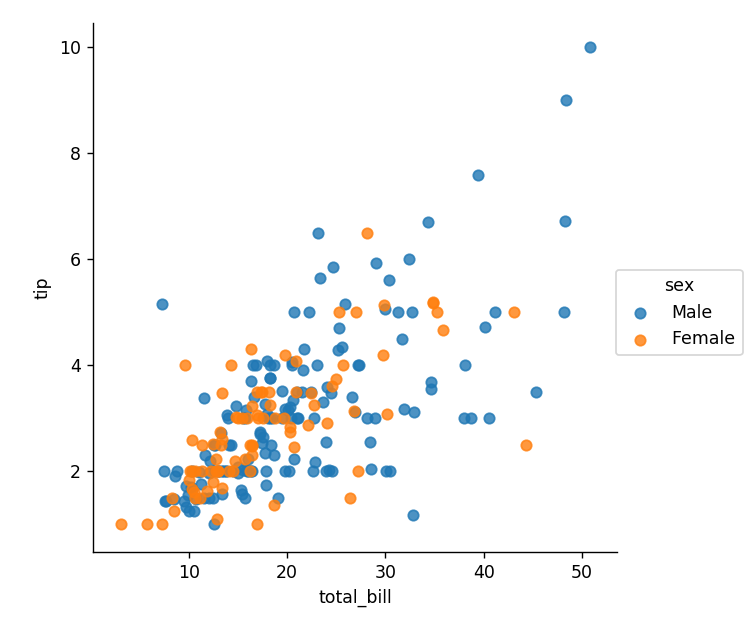

In [321]:
# sex 별 색상 추가
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


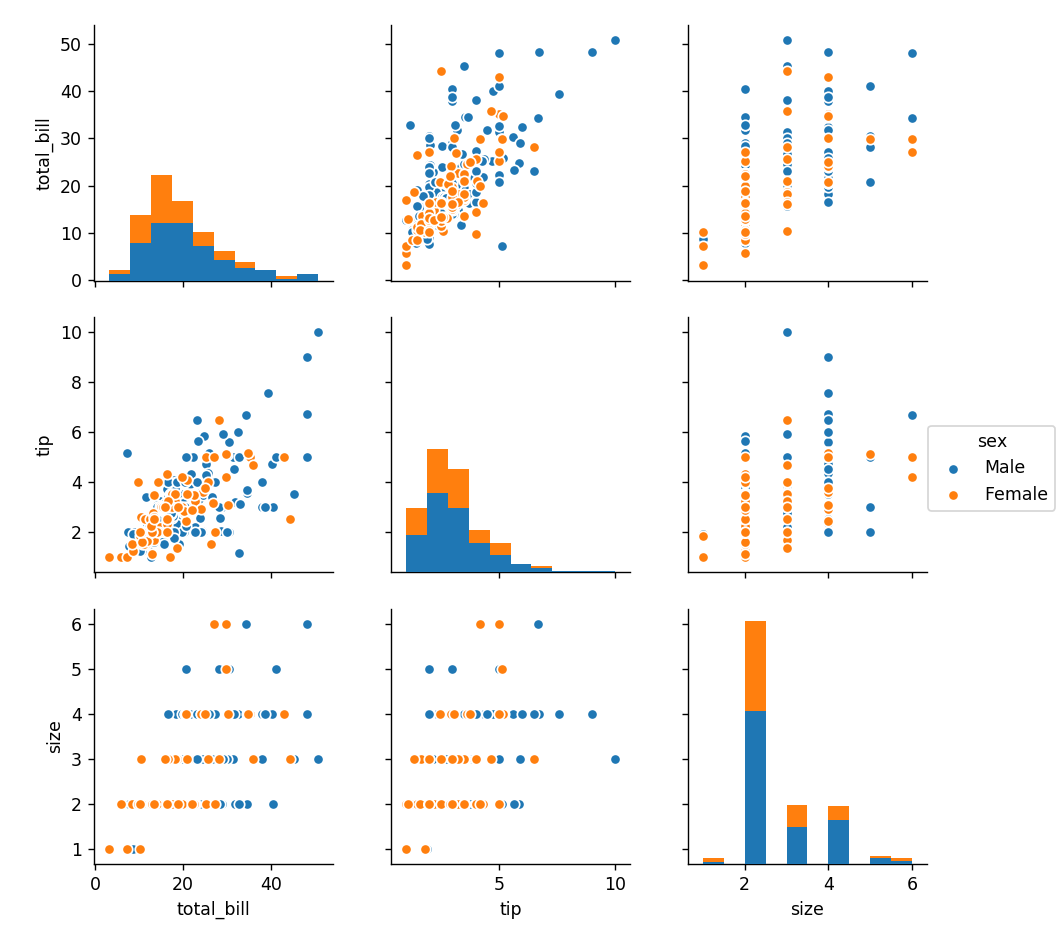

In [322]:
fig = sns.pairplot(tips, hue='sex')

* 산점도 그래프의 크기와 모양 조절하기

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


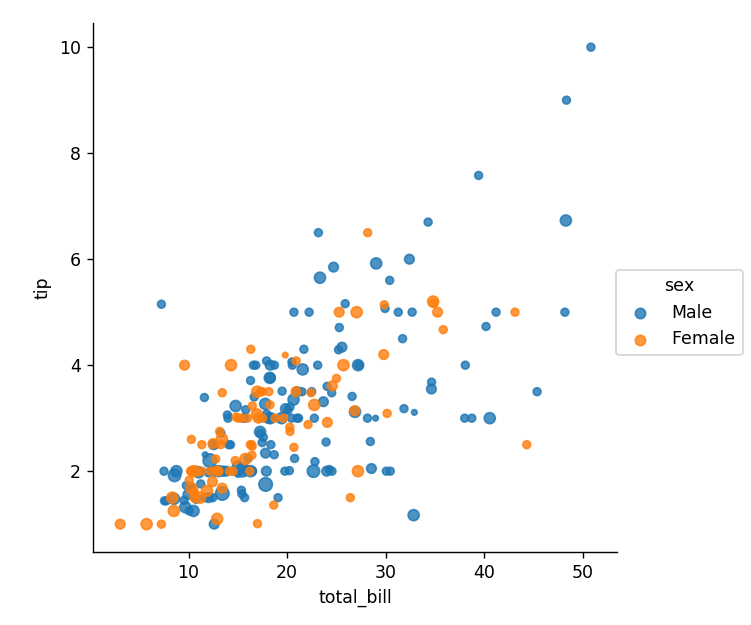

In [325]:
# 산점도 그래프의 점 크기를 조절하려면 scatter_kws에 인자값을 전달
# 크기 조절을 위해서 {'s': 크기} 전달
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex',
                    scatter_kws={'s': tips['size']*10})

* 산점도 그래프의 점을 다른 기호로 표현하기.

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


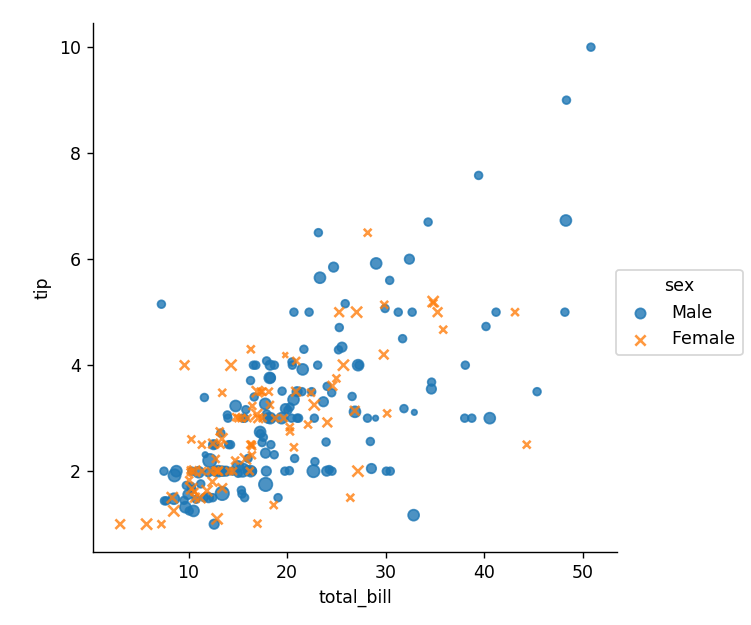

In [327]:
# marker = [인자값에 표현하고자하는 기호들]
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex',
                    markers=['o', 'x'], scatter_kws={'s': tips['size']*10})

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


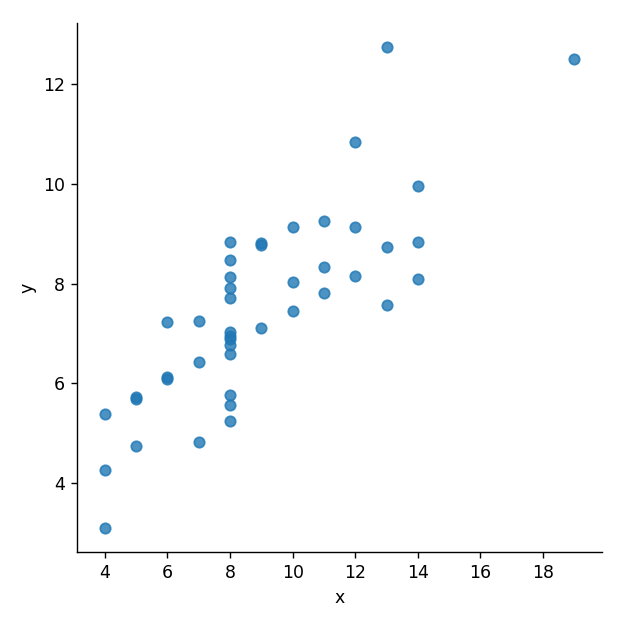

In [328]:
# fit_reg = 회귀선의 유무를 지정하는 값
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False)

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


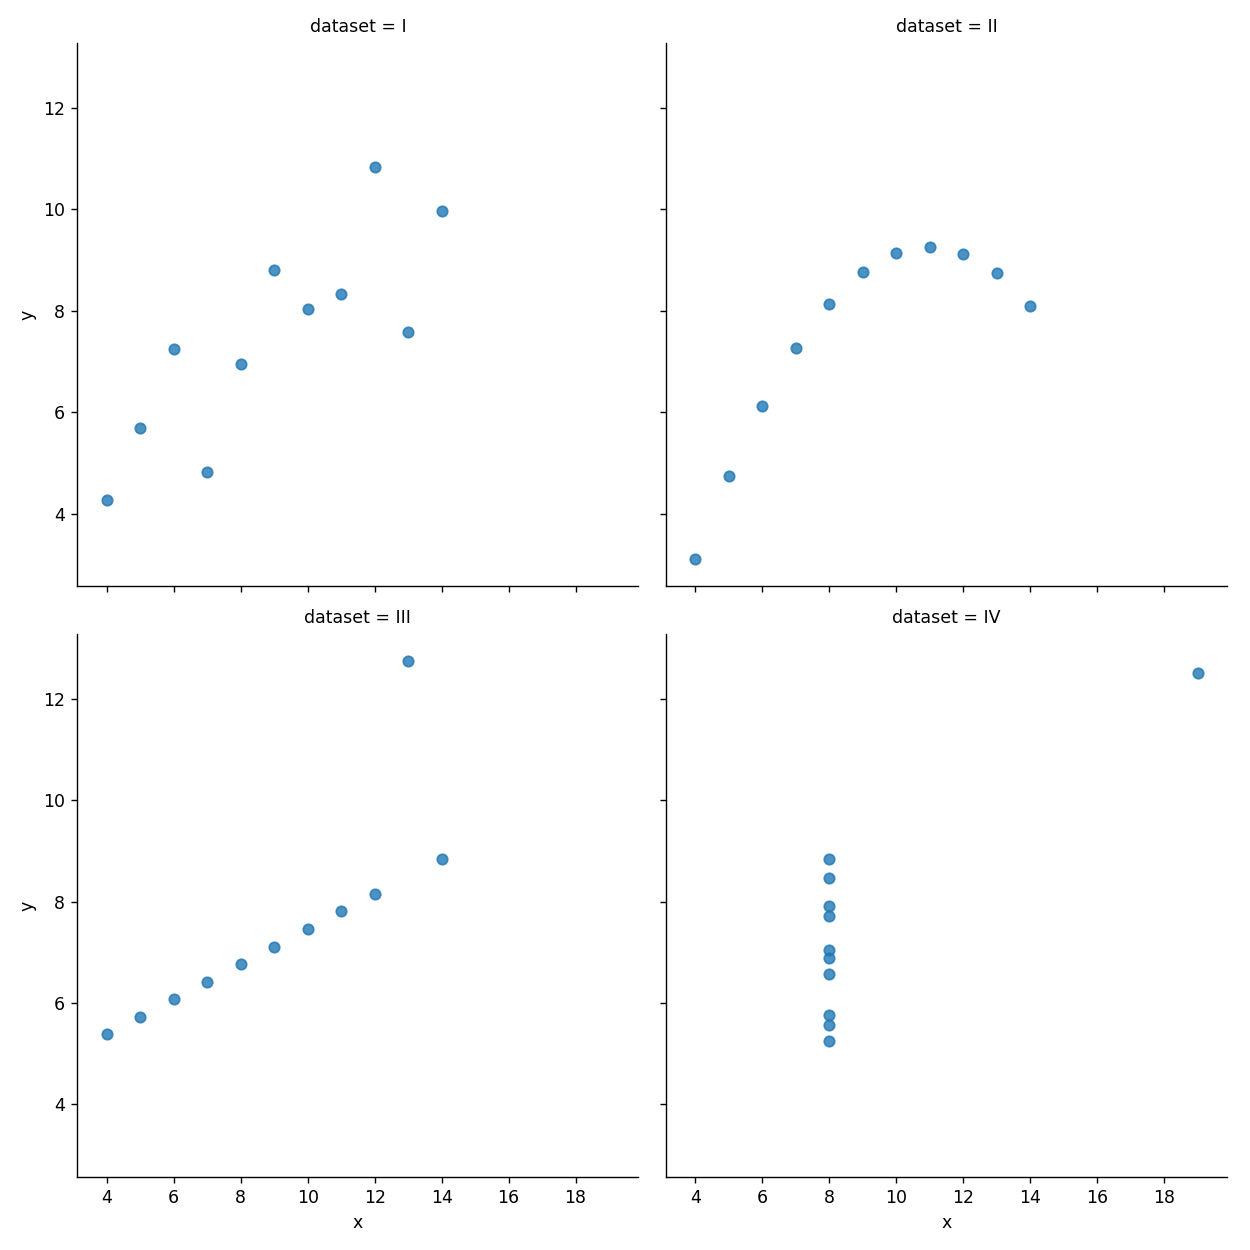

In [355]:
# 그룹별로 그래프를 나누어 그리려면 
# lmplot() 에 col, col_wrap인자를 설정해야한다.
# col = 데이터를 구분할 열
# col_wrap = 그래프를 그릴 열의 최대값을 지정

anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False,
                          col='dataset', col_wrap=2)

* FaceGrid(대상 데이터프레임, col=그룹을 구분할 열이름) @return 객체(facet)
* 객체(facet)의 map 메서드에 그래프 종류(distplot)와 x축으로 지정할 열 이름을 순서대로 전달

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


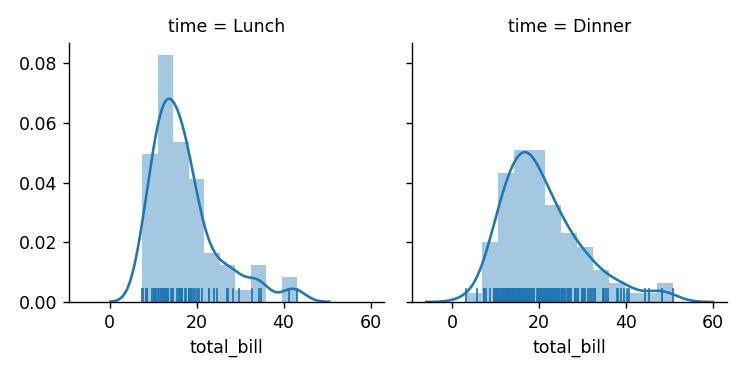

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [363]:
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=True)

In [356]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


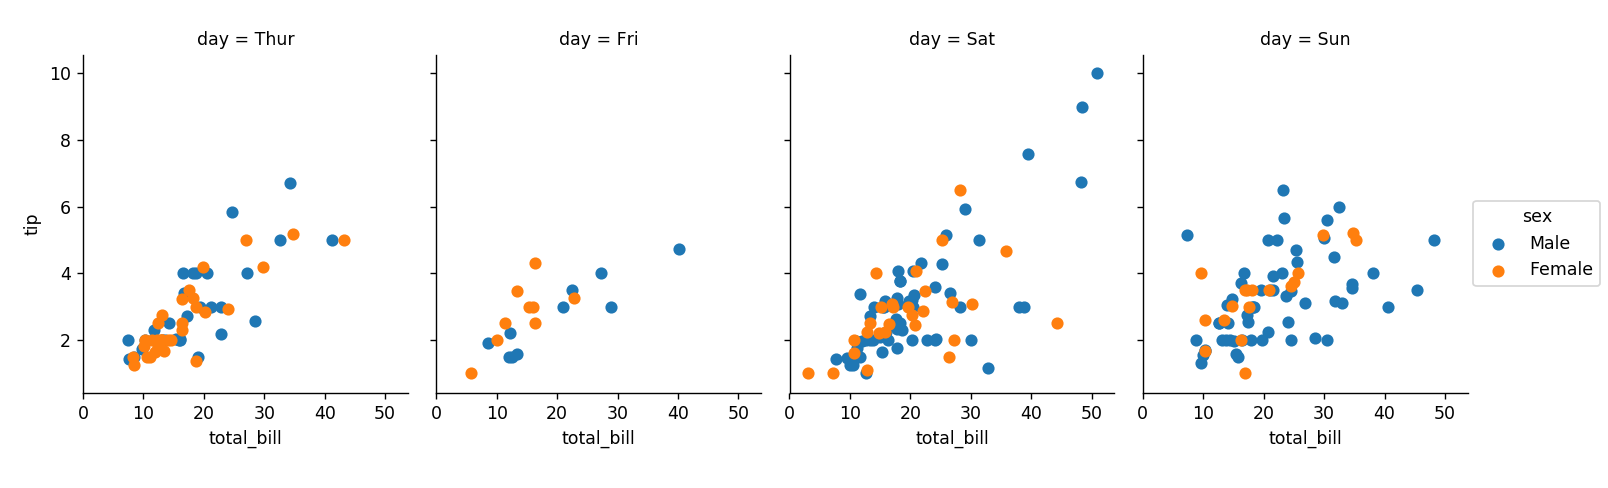

In [366]:
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend() # 범주 표 추가

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


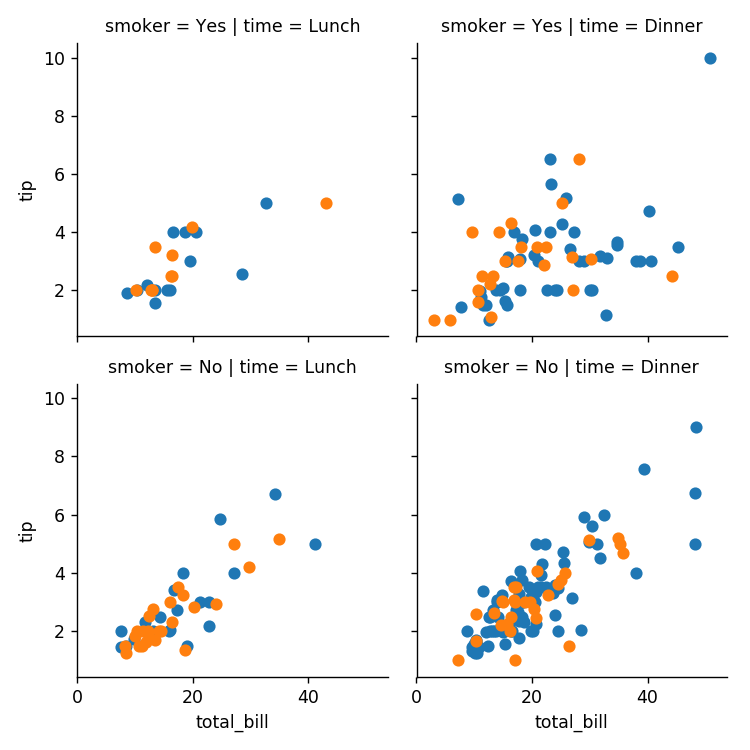

In [367]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')

* 시리즈에 있는 plot 속성에 정의된 .hist() 를 사용하면 히스토그램을 바로 그릴 수 있다.

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


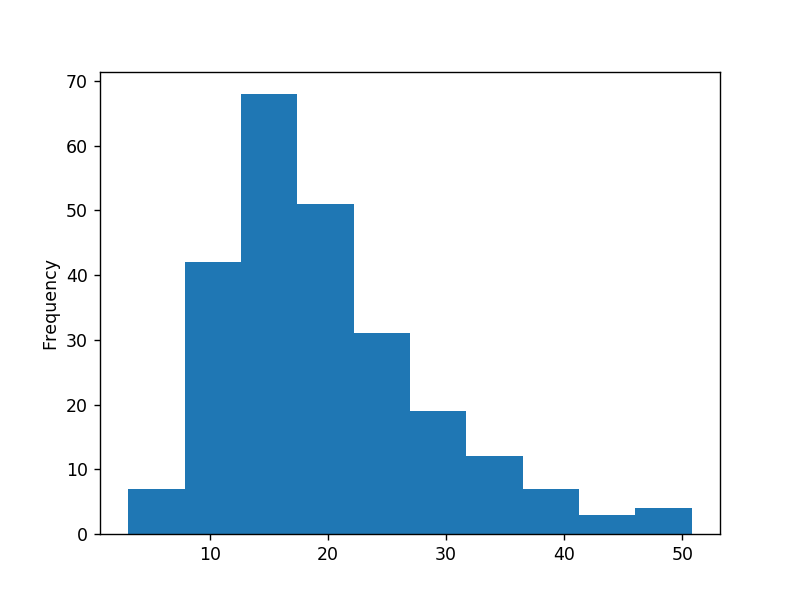

In [380]:
ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

* alpha = 투명도
* bins = x축의 간격
* ax = axes

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


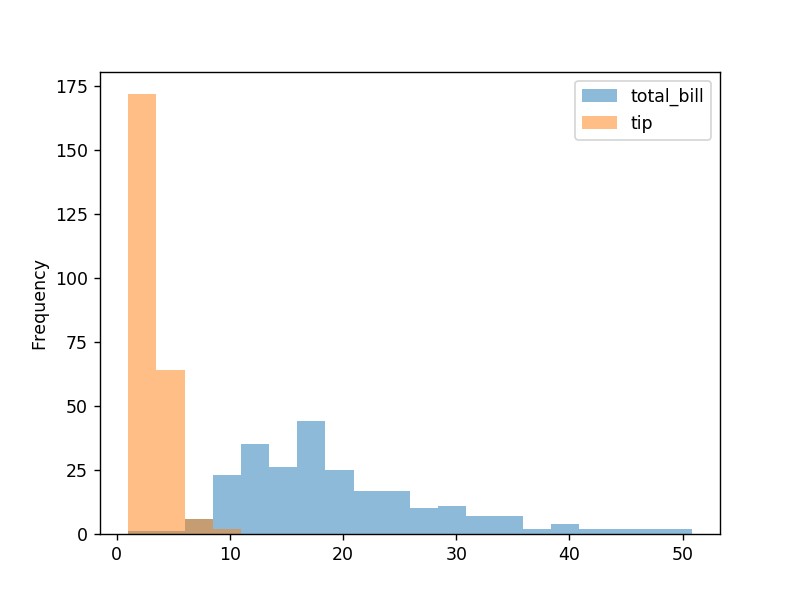

In [377]:
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax)

* 밀집도 그래프

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


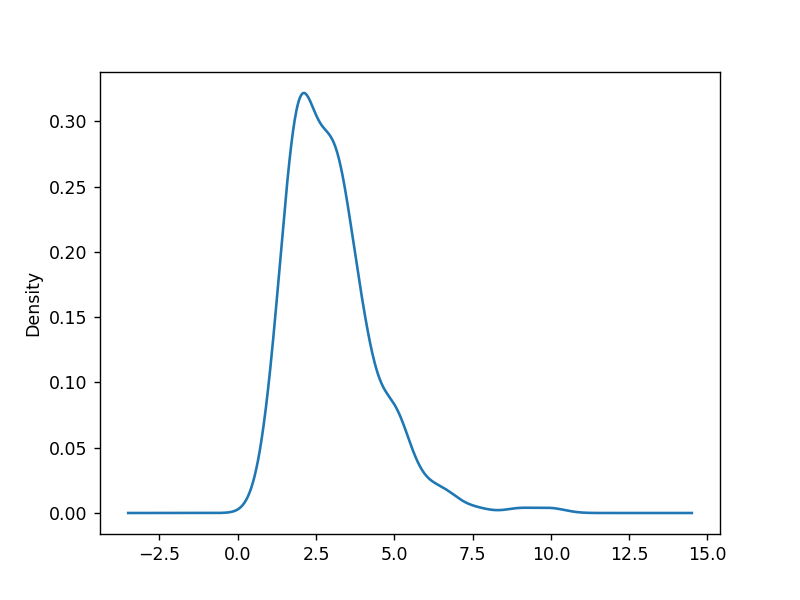

In [382]:
ax = plt.subplots()
ax = tips['tip'].plot.kde()

* 산점도 그래프

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


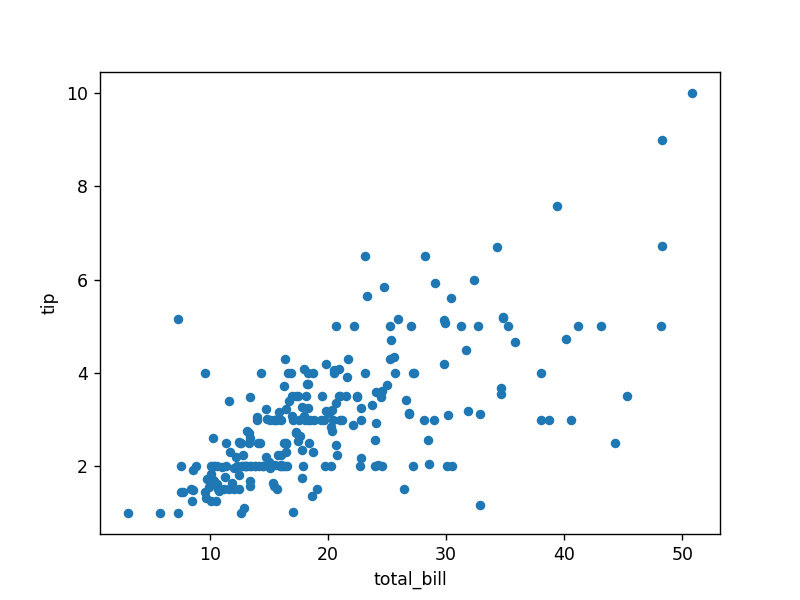

In [383]:
fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax)

* 육각 그래프

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


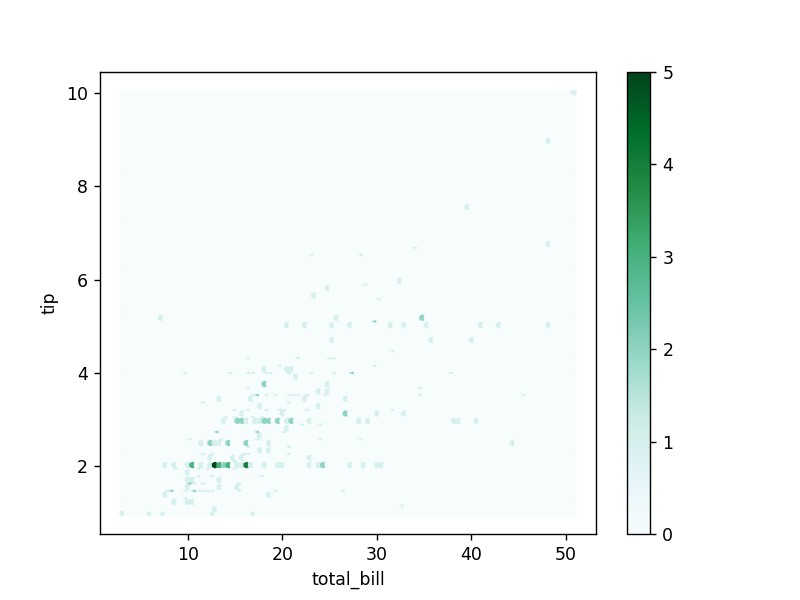

In [385]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', ax=ax)

* 육각 그래프
* gridsize = 육각형 크기

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


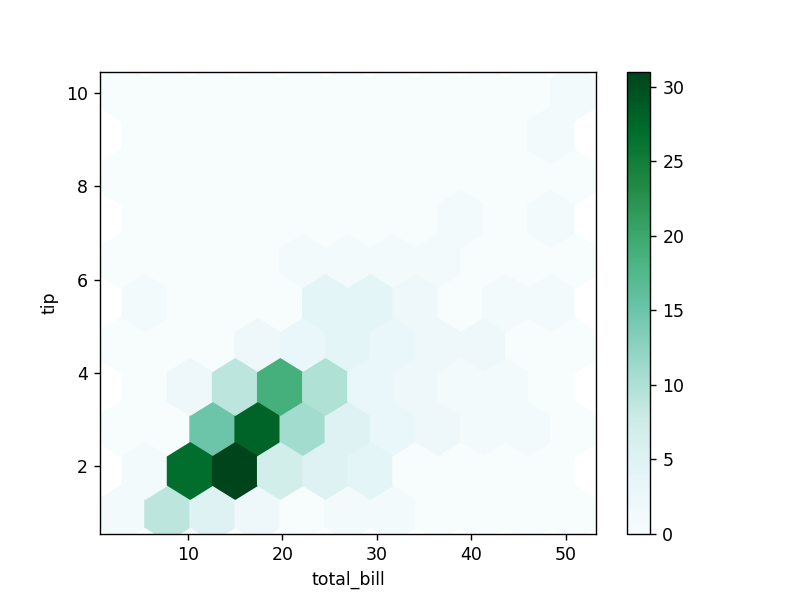

In [388]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax)

* box 메서드를 사용

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


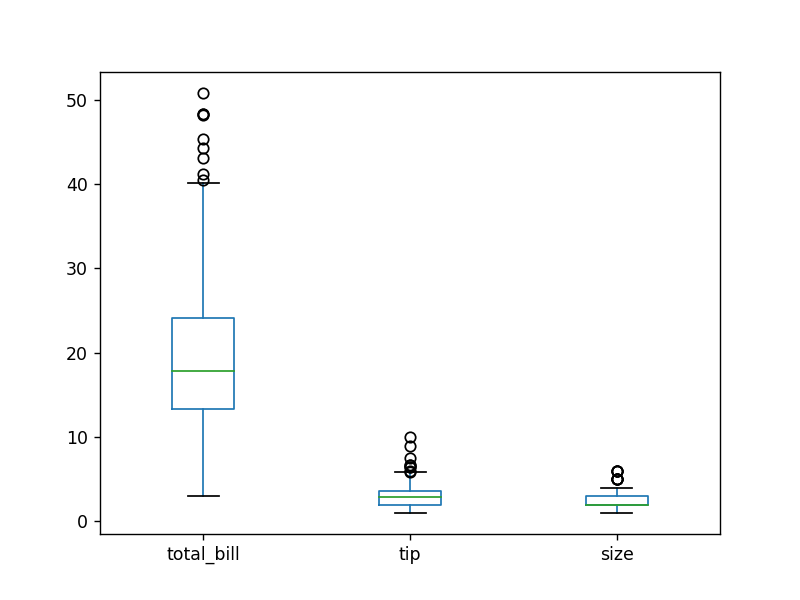

In [389]:
fig, ax = plt.subplots()
ax = tips.plot.box(ax = ax)

### 그래프 스타일 설정하기

* seaborn 라이브러리로 만든 그래프 스타일은 set_style() 를 사용하여 바꿀 수 있습니다.
* set_style() 은 적용할 부분에서 한번만 실행.
* 실행한 이후의 그래프가 모두 지정한 스타일로 바뀜.

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


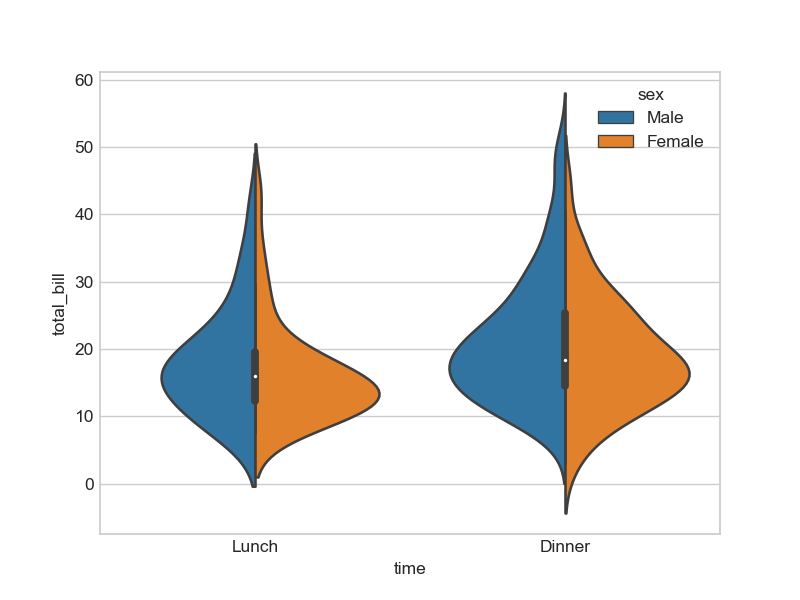

In [391]:
sns.set_style('whitegrid') # 그래프 배경에 가로줄 만들기
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

* for 문을 이용하여 모든 스타일을 하나씩 적용한 그래프

C:\Users\renz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


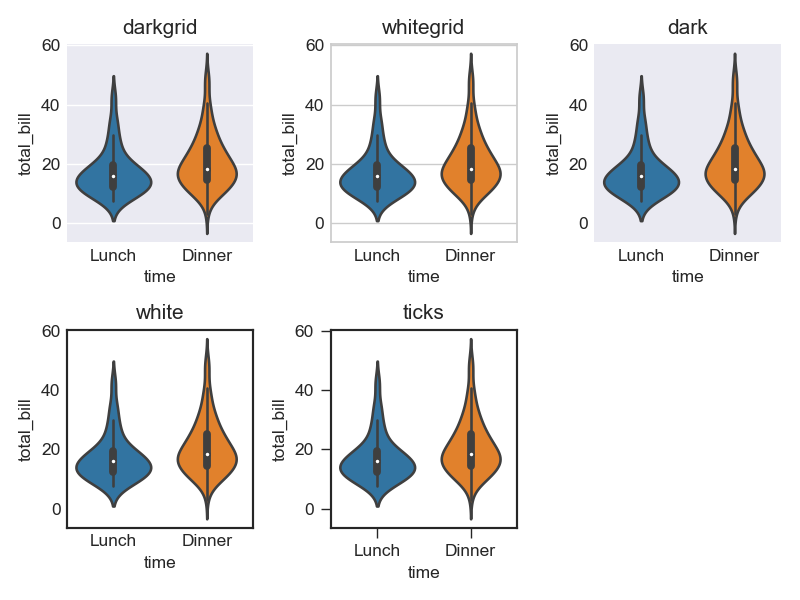

In [393]:
fig = plt.figure()

seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_position)
        violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
        violin.set_title(style)
fig.tight_layout()

### 분석하기 좋은 데이터 집합을 만들기

* 분석하기 좋은 데이터?
    * 데이터 분석 목적에 맞는 데이터를 모아 새로운 표를 만들어야 한다.
    * 측정한 값은 행(row)을 구성해야 합니다.
    * 변수는 열(column)로 구성해야 합니다.

In [396]:
import pandas as pd

df1 = pd.read_csv('../data/concat_1.csv')
df2 = pd.read_csv('../data/concat_2.csv')
df3 = pd.read_csv('../data/concat_3.csv')

* concat() 을 이용하여 데이터 연결하기
* 위에서 아래 방향으로 연결
* df1, df2, df3 모두 열 이름이 같으므로, 
* 그래서 데이터프레임을 연결한 다음에도 열이 그대로 유지
* 인덱스도 그대로 유지

In [397]:
row_concat = pd.concat([df1, df2, df3])
print(row_concat)

     A    B    C    D
0   a0   b0   c0   d0
1   a1   b1   c1   d1
2   a2   b2   c2   d2
3   a3   b3   c3   d3
0   a4   b4   c4   d4
1   a5   b5   c5   d5
2   a6   b6   c6   d6
3   a7   b7   c7   d7
0   a8   b8   c8   d8
1   a9   b9   c9   d9
2  a10  b10  c10  d10
3  a11  b11  c11  d11


In [405]:
# 합쳐진 data frame에서 행번호로 찾음
print(row_concat.iloc[3])

A    a3
B    b3
C    c3
D    d3
Name: 3, dtype: object


In [406]:
# 합쳐진 data frame에서 인덱스로 찾음
# 인덱스도 그대로 유지되기 때문에 3개 출력
print(row_concat.loc[3])

     A    B    C    D
3   a3   b3   c3   d3
3   a7   b7   c7   d7
3  a11  b11  c11  d11


### 데이터 프레임에 시리즈 연결하기

* concat() 으로 연결하면 시리즈가 새로운 행으로 추가될 것 같지만,
* 행이 아니라 새로운 열이 추가됩니다.
* NaN이라는 누락값이 생긴다.


In [409]:
new_row_series = pd.Series(['n1', 'n2', 'n3', 'n4'])
print(new_row_series)

0    n1
1    n2
2    n3
3    n4
dtype: object


In [410]:
print(pd.concat([df1, new_row_series]))

     A    B    C    D    0
0   a0   b0   c0   d0  NaN
1   a1   b1   c1   d1  NaN
2   a2   b2   c2   d2  NaN
3   a3   b3   c3   d3  NaN
0  NaN  NaN  NaN  NaN   n1
1  NaN  NaN  NaN  NaN   n2
2  NaN  NaN  NaN  NaN   n3
3  NaN  NaN  NaN  NaN   n4


***그래서, 행이 1개라도 반드시 데이터 프레임에 담아 연결해야 합니다.***
* 시리즈에는 열이름이 없기 때문에 시리즈를 새로운 열로 간주하여,
* 0이라는 이름으로 열을 추가함.

In [411]:
new_row_df =pd.DataFrame([['n1', 'n2', 'n3', 'n4']], columns=['A', 'B', 'C', 'D'])
print(new_row_df)

    A   B   C   D
0  n1  n2  n3  n4


In [412]:
print(df1.append(new_row_df))

    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
3  a3  b3  c3  d3
0  n1  n2  n3  n4


*** append() 와 딕셔너리를 사용하면 행을 연결하기 편함 ***
* ignore_index를 True 로 설정하면 데이터를 연결한 다음 데이터프레임의 인덱스를 0 부터 다시 지정

In [415]:
data_dict = {'A': 'n1', 'B': 'n2', 'C': 'n3', 'D': 'n4'}
print(df1.append(data_dict, ignore_index=True))

    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
3  a3  b3  c3  d3
4  n1  n2  n3  n4


In [417]:
row_concat = pd.concat([df1, df2, df3], ignore_index=True)
print(row_concat)

      A    B    C    D
0    a0   b0   c0   d0
1    a1   b1   c1   d1
2    a2   b2   c2   d2
3    a3   b3   c3   d3
4    a4   b4   c4   d4
5    a5   b5   c5   d5
6    a6   b6   c6   d6
7    a7   b7   c7   d7
8    a8   b8   c8   d8
9    a9   b9   c9   d9
10  a10  b10  c10  d10
11  a11  b11  c11  d11


*** 만약, 열방향으로 데이트럴 연결하고 싶다면... ***
* axis=1로 지정 하면된다.
* cf) axis의 기본값은 0

In [420]:
col_concat = pd.concat([df1, df2, df3], axis=1)
print(col_concat)

    A   B   C   D   A   B   C   D    A    B    C    D
0  a0  b0  c0  d0  a4  b4  c4  d4   a8   b8   c8   d8
1  a1  b1  c1  d1  a5  b5  c5  d5   a9   b9   c9   d9
2  a2  b2  c2  d2  a6  b6  c6  d6  a10  b10  c10  d10
3  a3  b3  c3  d3  a7  b7  c7  d7  a11  b11  c11  d11


In [423]:
print(col_concat['A'])

    A   A    A
0  a0  a4   a8
1  a1  a5   a9
2  a2  a6  a10
3  a3  a7  a11


In [422]:
col_concat['new_col_list'] = ['n1', 'n2', 'n3', 'n4']
print(col_concat)

    A   B   C   D   A   B   C   D    A    B    C    D new_col_list
0  a0  b0  c0  d0  a4  b4  c4  d4   a8   b8   c8   d8           n1
1  a1  b1  c1  d1  a5  b5  c5  d5   a9   b9   c9   d9           n2
2  a2  b2  c2  d2  a6  b6  c6  d6  a10  b10  c10  d10           n3
3  a3  b3  c3  d3  a7  b7  c7  d7  a11  b11  c11  d11           n4


*** 열 이름이 중복되지 않게 하려면... ***
* ignore_index=True

In [424]:
print(pd.concat([df1, df2, df3], axis=1, ignore_index=True))

   0   1   2   3   4   5   6   7    8    9    10   11
0  a0  b0  c0  d0  a4  b4  c4  d4   a8   b8   c8   d8
1  a1  b1  c1  d1  a5  b5  c5  d5   a9   b9   c9   d9
2  a2  b2  c2  d2  a6  b6  c6  d6  a10  b10  c10  d10
3  a3  b3  c3  d3  a7  b7  c7  d7  a11  b11  c11  d11


*** 공통 열과 공통 인덱스만 연결하기 ***


In [427]:
df1.columns = ['A', 'B', 'C', 'D']
df2.columns = ['E', 'F', 'G', 'H']
df3.columns = ['A', 'C', 'F', 'H']

In [426]:
row_concat = pd.concat([df1, df2, df3])
print(row_concat)

     A    B    C    D    E    F    G    H
0   a0   b0   c0   d0  NaN  NaN  NaN  NaN
1   a1   b1   c1   d1  NaN  NaN  NaN  NaN
2   a2   b2   c2   d2  NaN  NaN  NaN  NaN
3   a3   b3   c3   d3  NaN  NaN  NaN  NaN
0  NaN  NaN  NaN  NaN   a4   b4   c4   d4
1  NaN  NaN  NaN  NaN   a5   b5   c5   d5
2  NaN  NaN  NaN  NaN   a6   b6   c6   d6
3  NaN  NaN  NaN  NaN   a7   b7   c7   d7
0   a8  NaN   b8  NaN  NaN   c8  NaN   d8
1   a9  NaN   b9  NaN  NaN   c9  NaN   d9
2  a10  NaN  b10  NaN  NaN  c10  NaN  d10
3  a11  NaN  b11  NaN  NaN  c11  NaN  d11


C:\Users\renz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


*** df1, df2, df3 3개의 공통 열 이름이 없어서... 빈 data frame이 나온다 ***

In [428]:
print(pd.concat([df1, df2, df3], join='inner'))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]


In [433]:
print(pd.concat([df1, df3],ignore_index=False, join='inner'))

     A    C
0   a0   c0
1   a1   c1
2   a2   c2
3   a3   c3
0   a8   b8
1   a9   b9
2  a10  b10
3  a11  b11


In [434]:
df1.index = [0, 1, 2, 3]
df2.index = [4, 5, 6, 7]
df3.index = [0, 2, 5, 7]

    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
3  a3  b3  c3  d3


In [438]:
col_concat = pd.concat([df1, df2, df3], axis=1)
print(col_concat)

     A    B    C    D    E    F    G    H    A    C    F    H
0   a0   b0   c0   d0  NaN  NaN  NaN  NaN   a8   b8   c8   d8
1   a1   b1   c1   d1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2   a2   b2   c2   d2  NaN  NaN  NaN  NaN   a9   b9   c9   d9
3   a3   b3   c3   d3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN   a4   b4   c4   d4  NaN  NaN  NaN  NaN
5  NaN  NaN  NaN  NaN   a5   b5   c5   d5  a10  b10  c10  d10
6  NaN  NaN  NaN  NaN   a6   b6   c6   d6  NaN  NaN  NaN  NaN
7  NaN  NaN  NaN  NaN   a7   b7   c7   d7  a11  b11  c11  d11


In [436]:
print(pd.concat([df1, df3], axis=1, join='inner'))

    A   B   C   D   A   C   F   H
0  a0  b0  c0  d0  a8  b8  c8  d8
2  a2  b2  c2  d2  a9  b9  c9  d9


In [442]:
print(pd.concat([df1, df3], axis=1, join='outer'))

     A    B    C    D    A    C    F    H
0   a0   b0   c0   d0   a8   b8   c8   d8
1   a1   b1   c1   d1  NaN  NaN  NaN  NaN
2   a2   b2   c2   d2   a9   b9   c9   d9
3   a3   b3   c3   d3  NaN  NaN  NaN  NaN
5  NaN  NaN  NaN  NaN  a10  b10  c10  d10
7  NaN  NaN  NaN  NaN  a11  b11  c11  d11


*** 내부조인(inner)과 외부조인(outer) ***

* 내부 조인(inner) - 둘이상의 데이터프레임에서 조건에 맞는 행을 연결하는 것
* 외부 조인(outer) - 어떤 데이터프레임을 기준으로 할 것인지 정해야한다.
    * 왼쪽 외부조인(left outer) - 왼쪽 데이터프레임을 모두 포함하여 연결 하는 것
    * 오른쪽 외부조인(right outer) - 오른쪽 데이터프레임을 모두 포함하여 연결하는 것
    * 완전 외부 조인(Full outer) - 왼쪽과 오른쪽 데이터 프레임을 모두 포함하여 연결하는 것

*** merge 메서드 사용하기 ***

* merge()는 기본적으로 내부조인을 실행.

In [444]:
person = pd.read_csv('../data/survey_person.csv')
site = pd.read_csv('../data/survey_site.csv')
survey = pd.read_csv('../data/survey_survey.csv')
visited = pd.read_csv('../data/survey_visited.csv')

In [446]:
visited_subset = visited.loc[[0, 2, 6], ]
print(visited_subset)

   ident   site       dated
0    619   DR-1  1927-02-08
2    734   DR-3  1939-01-07
6    837  MSK-4  1932-01-14


* left_on = 왼쪽에서 일치해야할 열
* right_on = 오른쪽에서 일치해야할 열

In [447]:
o2o_merge= site.merge(visited_subset, left_on='name', right_on='site')
print(o2o_merge)

    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
2  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14


In [448]:
o2o_merge= site.merge(visited, left_on='name', right_on='site')
print(o2o_merge)

    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-1 -49.85 -128.57    622   DR-1  1927-02-10
2   DR-1 -49.85 -128.57    844   DR-1  1932-03-22
3   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
4   DR-3 -47.15 -126.72    735   DR-3  1930-01-12
5   DR-3 -47.15 -126.72    751   DR-3  1930-02-26
6   DR-3 -47.15 -126.72    752   DR-3         NaN
7  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14


* left_on, right_on 에 전달하는 값은 여러개라도 상관 없다.
* _x - 왼쪽 데이터프레임의 열
* _y - 오른쪽 데이터프레임의 열

In [452]:
ps = person.merge(survey, left_on='ident', right_on='person')
vs = visited.merge(survey, left_on='ident', right_on='taken')

ps_vs = ps.merge(vs, left_on=['ident', 'taken', 'quant', 'reading'],
                 right_on=['person', 'ident', 'quant', 'reading'])
print(ps_vs)

   ident_x   personal   family  taken_x person_x quant  reading  ident_y  \
0     dyer    William     Dyer      619     dyer   rad     9.82      619   
1     dyer    William     Dyer      619     dyer   sal     0.13      619   
2     dyer    William     Dyer      622     dyer   rad     7.80      622   
3     dyer    William     Dyer      622     dyer   sal     0.09      622   
4       pb      Frank  Pabodie      734       pb   rad     8.41      734   
5       pb      Frank  Pabodie      734       pb  temp   -21.50      734   
6       pb      Frank  Pabodie      735       pb   rad     7.22      735   
7       pb      Frank  Pabodie      751       pb   rad     4.35      751   
8       pb      Frank  Pabodie      751       pb  temp   -18.50      751   
9     lake   Anderson     Lake      734     lake   sal     0.05      734   
10    lake   Anderson     Lake      751     lake   sal     0.10      751   
11    lake   Anderson     Lake      752     lake   rad     2.19      752   
12    lake  